# Практическая работа №4

По теме: "Корреляция, линейная регрессия и дисперсионный анализ"

Выполнил: студент группы ИВБО-07-21 Чан Минь Ханг

Принял: старший преподаватель кафедры ПМ Юрченков И.А.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

### 1.
Определить два вектора, представляющие собой число автомобилей, 
припаркованных в течении 5 рабочих дней у бизнес-центра на уличной 
стоянке и в подземном гараже. 

In [2]:
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница']
street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

1.1. Найти и интерпретировать корреляцию между переменными «Улица» и «Гараж» (подсчитать корреляцию по Пирсону).

In [3]:
correlation = np.corrcoef(street, garage)[0][1]
print(f"Коэффициент корреляции Пирсона: {correlation}")

Коэффициент корреляции Пирсона: -0.9999999999999998


*Коэффициент корреляции практически равен –1, что означает сильную отрицательную корреляцию.*

1.2. Построить диаграмму рассеяния для вышеупомянутых переменных. 

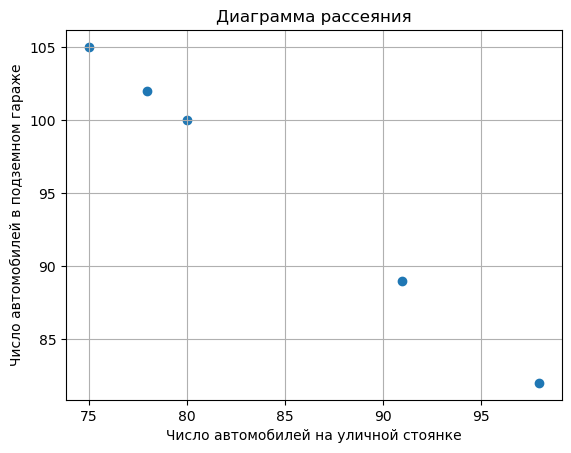

In [4]:
plt.scatter(street, garage)
plt.title("Диаграмма рассеяния")
plt.xlabel("Число автомобилей на уличной стоянке")
plt.ylabel("Число автомобилей в подземном гараже")
plt.grid()
plt.show()

### 2.
Найти и выгрузить данные. Вывести, провести предобработку и 
описать признаки. 

In [5]:
# url = "https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated?select=Life-Expectancy-Data-Updated.csv"

data = pd.read_csv('Life Expectancy.csv')

*Данные содержат продолжительность жизни, здоровье, иммунизацию, а также экономическую и демографическую информацию о 179 странах за период с 2000 по 2015 годы. Набор данных содержит 2,864 строки и  21 переменную, в том числе:*

- Country: Список 179 стран
- Region: 179 стран распределены по 9 регионам (Африка, Азия, Океания, Европейский союз, Остальная Европа и т. д.)

- Year: Годы наблюдения с 2000 по 2015 г.
- GDP_per_capita: ВВП на душу населения в текущих долларах США.
- Population_mln: Общая численность населения в миллионах

- Life_expectancy: Средняя ожидаемая продолжительность жизни обоих полов в разные годы с 2010 по 2015 г.
- Infant_deaths: Представляет количество смертей младенцев на 1000 населения
- Under_five_deaths: Представляет количество смертей детей в возрасте до пяти лет на 1000 населения
- Adult_mortality: Представляет количество смертей взрослых на 1000 населения

- BMI: ИМТ является мерой статуса питания у взрослых. Он определяется как вес человека в килограммах, деленный на квадрат роста этого человека в метрах (кг/м2)
- Thinness_ten_nineteen_years: распространенность худобы среди подростков в возрасте 10-19 лет. ИМТ < -2 стандартных отклонений ниже медианы.
- Thinness_five_nine_years: распространенность худобы среди детей в возрасте 5-9 лет. ИМТ < -2 стандартных отклонений ниже медианы.

- Alcohol_consumption: потребление алкоголя, которое регистрируется в литрах чистого алкоголя на душу населения в возрасте 15+ лет.
- Incidents_HIV: число случаев ВИЧ на 1000 населения в возрасте 15-49 лет.
- Hepatitis_B: процент охвата вакцинацией от гепатита B (HepB3) среди детей в возрасте 1 года.
- Measles: представляет собой % охвата вакциной от кори, содержащей первую дозу (MCV1), среди детей в возрасте 1 года.
- Polio: представляет собой % охвата вакциной от полиомиелита (Pol3) среди детей в возрасте 1 года.
- Diphtheria: представляет собой % охвата вакцинацией от дифтерии, столбняка и коклюша (DTP3) среди детей в возрасте 1 года.

In [6]:
data.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.53   
1          97           0.09           25742           46.44   
2          64           0.13            1076         1183.21   
3          93           0.79            4146            0.75   
4          94           0.08           33995            7.91   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                       4.8        7.8   
1                          0.6                       0.5        9.7   
2                         27.1                      28.0        5.0   
3                          5.7                       5.5        7.9   
4                          1.2                       1.1       12.8   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             76.5  
1                         1                          0             82.8  
2                         0                          1             65.4  
3                         0                          1             67.0  
4                         1                          0             81.7  

[5 rows x 21 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [8]:
data = data.dropna()
data.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [9]:
# data['Year'] = pd.to_datetime(data['Year'], format='%Y')
# data = data.sort_values(by=['Year'])
# data = data[data['Country'] == "Russian Federation"].sort_values(by=['Year'])

data = data[['Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 
             'GDP_per_capita', 'Population_mln', 'Schooling', 'Life_expectancy']]

# data.head()

In [10]:
data.describe()

Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820882    84.292598    77.344972    25.032926   
std               3.981949    15.995511    18.659693     2.193905   
min               0.000000    12.000000    10.000000    19.800000   
25%               1.200000    78.000000    64.000000    23.200000   
50%               4.020000    89.000000    83.000000    25.500000   
75%               7.777500    96.000000    93.000000    26.400000   
max              17.870000    99.000000    99.000000    32.100000   

             Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  2864.000000  2864.000000    2864.000000     2864.000000   
mean     86.499651    86.271648       0.894288    11540.924930   
std      15.080365    15.534225       2.381389    16934.788931   
min       8.000000    16.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1415.750000   
50%      93.000000    93.000000       0.150000     4217.000000   
75%      97.000000    97.000000       0.460000    12557.000000   
max      99.000000    99.000000      21.680000   112418.000000   

       Population_mln    Schooling  Life_expectancy  
count     2864.000000  2864.000000      2864.000000  
mean        36.675915     7.632123        68.856075  
std        136.485867     3.171556         9.405608  
min          0.080000     1.100000        39.400000  
25%          2.097500     5.100000        62.700000  
50%          7.850000     7.800000        71.400000  
75%         23.687500    10.300000        75.400000  
max       1379.860000    14.100000        83.800000

2.1. Построить корреляционную матрицу по одной целевой переменной. 
Определить наиболее коррелирующую переменную, продолжить с 
ней работу в следующем пункте. 

In [11]:
target = 'Life_expectancy'
correlation_matrix = data.corr().Life_expectancy.to_frame()
correlation_matrix.style.background_gradient(cmap='coolwarm')

In [12]:
most_correlated = correlation_matrix[target][correlation_matrix['Life_expectancy'] != 1].abs().idxmax()

direction = 'положительная' if correlation_matrix[target][most_correlated] > 0 else 'отрицательная'

print(f"Наиболее коррелирующая переменная: {most_correlated} (корреляция {direction})")

Наиболее коррелирующая переменная: Schooling (корреляция положительная)


2.2. Реализовать регрессию вручную, отобразить наклон, сдвиг и MSE. 

In [13]:
model = LinearRegression()

X = data[[most_correlated]]
y = data[target]

X = np.array(X, type(float))
y = np.array(y, type(float))

model.fit(X,y)

print(f"Угол наклона: {model.coef_[0]}")
print(f"Коэффициент сдвига: {model.intercept_}")

model_a = model.coef_[0]
model_b = model.intercept_

model_y_sk = model_a * X + model_b

mse = mean_squared_error(model_y_sk, y)
print(f"Среднее квадратичное отклонение: {mse}")

Угол наклона: 2.1722657658099815
Коэффициент сдвига: 52.277076111948006
Среднее квадратичное отклонение: 40.986461827248796


In [14]:
def mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.sum((y  - y_pred) ** 2 / len(y_pred))

def gr_mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.array([2 / len(X) * np.sum(y - y_pred) / (-1),
                     2 / len(X) * np.sum((y  - y_pred) * (-X[:, 0]))])

eps = 0.0001

w1 = 0
w0 = 0

learning_rate = 0.001

next_w1 = w1
next_w0 = w0

n = 100000
for i in range(n):
    cur_w1 = next_w1
    cur_w0 = next_w0
    
    next_w0 = cur_w0 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[0]
    next_w1 = cur_w1 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[1]
    
    print(f"Итерация {i}")
    print(f"Текущая точка {cur_w1, cur_w0}")
    print(f"Следующая точка {next_w1, next_w0}")
    print(f"MSE {mserror(X, cur_w1, cur_w0, y)}")
    print("--------------------------------------------------")
    
    if(abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
        break
    

Итерация 0
Текущая точка (0, 0)
Следующая точка (1.0947214245810057, 0.1377121508379887)
MSE 4829.59369413408
--------------------------------------------------
Итерация 1
Текущая точка (1.0947214245810057, 0.1377121508379887)
Следующая точка (2.0377918617505264, 0.25843878045596247)
MSE 3696.391409028249
--------------------------------------------------
Итерация 2
Текущая точка (2.0377918617505264, 0.25843878045596247)
Следующая точка (2.8501874885159957, 0.36452869784554803)
MSE 2854.9359362216414
--------------------------------------------------
Итерация 3
Текущая точка (2.8501874885159957, 0.36452869784554803)
Следующая точка (3.5499830922957174, 0.4580058288583918)
MSE 2230.1011391182865
--------------------------------------------------
Итерация 4
Текущая точка (3.5499830922957174, 0.4580058288583918)
Следующая точка (4.152753386253316, 0.5406141534963199)
MSE 1766.1062130796404
--------------------------------------------------
Итерация 5
Текущая точка (4.152753386253316, 0.54

Итерация 93
Текущая точка (7.77304561848633, 2.2588849910989675)
Следующая точка (7.771418053338875, 2.2734296929414053)
MSE 409.2941171460511
--------------------------------------------------
Итерация 94
Текущая точка (7.771418053338875, 2.2734296929414053)
Следующая точка (7.76979081450725, 2.2879701489346407)
MSE 409.0799509689126
--------------------------------------------------
Итерация 95
Текущая точка (7.76979081450725, 2.2879701489346407)
Следующая точка (7.768163922223427, 2.3025063625894076)
MSE 408.8659093269319
--------------------------------------------------
Итерация 96
Текущая точка (7.768163922223427, 2.3025063625894076)
Следующая точка (7.766537393901918, 2.3170383371005916)
MSE 408.65199214762356
--------------------------------------------------
Итерация 97
Текущая точка (7.766537393901918, 2.3170383371005916)
Следующая точка (7.764911244529485, 2.3315660753908696)
MSE 408.43819935856294
--------------------------------------------------
Итерация 98
Текущая точка 

Итерация 187
Текущая точка (7.622013802178321, 3.60775385887194)
Следующая точка (7.620429092492978, 3.6219062097480967)
MSE 389.69725879033746
--------------------------------------------------
Итерация 188
Текущая точка (7.620429092492978, 3.6219062097480967)
Следующая точка (7.618844843618686, 3.6360544453206756)
MSE 389.4944879359645
--------------------------------------------------
Итерация 189
Текущая точка (7.618844843618686, 3.6360544453206756)
Следующая точка (7.617261055421464, 3.650198566786351)
MSE 389.2918349902418
--------------------------------------------------
Итерация 190
Текущая точка (7.617261055421464, 3.650198566786351)
Следующая точка (7.615677727767369, 3.664338575341448)
MSE 389.0892998846079
--------------------------------------------------
Итерация 191
Текущая точка (7.615677727767369, 3.664338575341448)
Следующая точка (7.614094860522493, 3.678474472181945)
MSE 388.8868825505379
--------------------------------------------------
Итерация 192
Текущая точка

Итерация 321
Текущая точка (7.413716950947354, 5.467962167497139)
Следующая точка (7.41219281104078, 5.481573596094695)
MSE 363.5502703719447
--------------------------------------------------
Итерация 322
Текущая точка (7.41219281104078, 5.481573596094695)
Следующая точка (7.410669114332546, 5.49518106668124)
MSE 363.3627036558632
--------------------------------------------------
Итерация 323
Текущая точка (7.410669114332546, 5.49518106668124)
Следующая точка (7.409145860693773, 5.508784580407705)
MSE 363.17524600742166
--------------------------------------------------
Итерация 324
Текущая точка (7.409145860693773, 5.508784580407705)
Следующая точка (7.407623049995624, 5.522384138424691)
MSE 362.98789736319634
--------------------------------------------------
Итерация 325
Текущая точка (7.407623049995624, 5.522384138424691)
Следующая точка (7.406100682109298, 5.5359797418824614)
MSE 362.80065765980464
--------------------------------------------------
Итерация 326
Текущая точка (7.

Итерация 495
Текущая точка (7.15507734426639, 7.7777596628943835)
Следующая точка (7.1536284131010675, 7.79069943503374)
MSE 332.5018449246546
--------------------------------------------------
Итерация 496
Текущая точка (7.1536284131010675, 7.79069943503374)
Следующая точка (7.152179903264445, 7.803635444470286)
MSE 332.33233246961225
--------------------------------------------------
Итерация 497
Текущая точка (7.152179903264445, 7.803635444470286)
Следующая точка (7.150731814634005, 7.816567692298165)
MSE 332.16291858388496
--------------------------------------------------
Итерация 498
Текущая точка (7.150731814634005, 7.816567692298165)
Следующая точка (7.1492841470872674, 7.829496179611197)
MSE 331.9936032101602
--------------------------------------------------
Итерация 499
Текущая точка (7.1492841470872674, 7.829496179611197)
Следующая точка (7.147836900501787, 7.842420907502888)
MSE 331.8243862911512
--------------------------------------------------
Итерация 500
Текущая точка

MSE 324.1458538122961
--------------------------------------------------
Итерация 546
Текущая точка (7.081716506400748, 8.432913302109897)
Следующая точка (7.0802889075299795, 8.445662564832835)
MSE 323.98120025887476
--------------------------------------------------
Итерация 547
Текущая точка (7.0802889075299795, 8.445662564832835)
Следующая точка (7.07886172378478, 8.45840812025041)
MSE 323.8166424493816
--------------------------------------------------
Итерация 548
Текущая точка (7.07886172378478, 8.45840812025041)
Следующая точка (7.077434955044438, 8.471149969440651)
MSE 323.65218032814306
--------------------------------------------------
Итерация 549
Текущая точка (7.077434955044438, 8.471149969440651)
Следующая точка (7.076008601188277, 8.483888113481278)
MSE 323.48781383951894
--------------------------------------------------
Итерация 550
Текущая точка (7.076008601188277, 8.483888113481278)
Следующая точка (7.074582662095652, 8.496622553449697)
MSE 323.3235429278988
-------

Итерация 680
Текущая точка (6.894070559515749, 10.10869739294735)
Следующая точка (6.892697525433596, 10.120959361347127)
MSE 302.76172494385884
--------------------------------------------------
Итерация 681
Текущая точка (6.892697525433596, 10.120959361347127)
Следующая точка (6.891324890610344, 10.13321776413984)
MSE 302.6095059870107
--------------------------------------------------
Итерация 682
Текущая точка (6.891324890610344, 10.13321776413984)
Следующая точка (6.889952654929893, 10.145472602362316)
MSE 302.45737554353184
--------------------------------------------------
Итерация 683
Текущая точка (6.889952654929893, 10.145472602362316)
Следующая точка (6.8885808182761785, 10.157723877051083)
MSE 302.3053335619525
--------------------------------------------------
Итерация 684
Текущая точка (6.8885808182761785, 10.157723877051083)
Следующая точка (6.88720938053317, 10.169971589242367)
MSE 302.15337999083715
--------------------------------------------------
Итерация 685
Текуща

Итерация 839
Текущая точка (6.680697770642319, 12.014236686214625)
Следующая точка (6.679386782350733, 12.025944550726408)
MSE 279.63764704120354
--------------------------------------------------
Итерация 840
Текущая точка (6.679386782350733, 12.025944550726408)
Следующая точка (6.678076175276008, 12.037649010756704)
MSE 279.49887443896694
--------------------------------------------------
Итерация 841
Текущая точка (6.678076175276008, 12.037649010756704)
Следующая точка (6.676765949307293, 12.049350067295489)
MSE 279.3601825312168
--------------------------------------------------
Итерация 842
Текущая точка (6.676765949307293, 12.049350067295489)
Следующая точка (6.675456104333767, 12.061047721332448)
MSE 279.22157127103134
--------------------------------------------------
Итерация 843
Текущая точка (6.675456104333767, 12.061047721332448)
Следующая точка (6.674146640244642, 12.072741973856983)
MSE 279.08304061151574
--------------------------------------------------
Итерация 844
Тек

Итерация 1020
Текущая точка (6.4495125472555745, 14.078851061422204)
Следующая точка (6.4482687843586985, 14.089958565261)
MSE 255.7898679429722
--------------------------------------------------
Итерация 1021
Текущая точка (6.4482687843586985, 14.089958565261)
Следующая точка (6.447025383130489, 14.101062839194705)
MSE 255.6649625183058
--------------------------------------------------
Итерация 1022
Текущая точка (6.447025383130489, 14.101062839194705)
Следующая точка (6.44578234346578, 14.112163884162532)
MSE 255.54012972454203
--------------------------------------------------
Итерация 1023
Текущая точка (6.44578234346578, 14.112163884162532)
Следующая точка (6.444539665259431, 14.123261701103416)
MSE 255.41536951944582
--------------------------------------------------
Итерация 1024
Текущая точка (6.444539665259431, 14.123261701103416)
Следующая точка (6.443297348406338, 14.134356290956024)
MSE 255.29068186080823
--------------------------------------------------
Итерация 1025
Тек

Итерация 1160
Текущая точка (6.278858171790068, 15.602890840507683)
Следующая точка (6.277664032773046, 15.613555175123976)
MSE 238.99127469400216
--------------------------------------------------
Итерация 1161
Текущая точка (6.277664032773046, 15.613555175123976)
Следующая точка (6.27647024099477, 15.624216408702521)
MSE 238.87613743578004
--------------------------------------------------
Итерация 1162
Текущая точка (6.27647024099477, 15.624216408702521)
Следующая точка (6.275276796354266, 15.63487454214506)
MSE 238.76106712839655
--------------------------------------------------
Итерация 1163
Текущая точка (6.275276796354266, 15.63487454214506)
Следующая точка (6.274083698750592, 15.645529576353066)
MSE 238.6460637329192
--------------------------------------------------
Итерация 1164
Текущая точка (6.274083698750592, 15.645529576353066)
Следующая точка (6.272890948082834, 15.656181512227755)
MSE 238.5311272104409
--------------------------------------------------
Итерация 1165
Те

Итерация 1325
Текущая точка (6.086450012607946, 17.321204171849324)
Следующая точка (6.085311823163552, 17.331368845240547)
MSE 220.87151411209976
--------------------------------------------------
Итерация 1326
Текущая точка (6.085311823163552, 17.331368845240547)
Следующая точка (6.084173964688559, 17.341530562888448)
MSE 220.76691326217318
--------------------------------------------------
Итерация 1327
Текущая точка (6.084173964688559, 17.341530562888448)
Следующая точка (6.083036437086725, 17.35168932565251)
MSE 220.66237323629946
--------------------------------------------------
Итерация 1328
Текущая точка (6.083036437086725, 17.35168932565251)
Следующая точка (6.081899240261836, 17.361845134391977)
MSE 220.55789399911006
--------------------------------------------------
Итерация 1329
Текущая точка (6.081899240261836, 17.361845134391977)
Следующая точка (6.0807623741177075, 17.371997989965834)
MSE 220.45347551525592
--------------------------------------------------
Итерация 13

Итерация 1488
Текущая точка (5.905227515283135, 18.939623236903092)
Следующая точка (5.904142022779033, 18.949317296909687)
MSE 204.6001471446915
--------------------------------------------------
Итерация 1489
Текущая точка (5.904142022779033, 18.949317296909687)
Следующая точка (5.903056845920806, 18.959008538020676)
MSE 204.50500788589054
--------------------------------------------------
Итерация 1490
Текущая точка (5.903056845920806, 18.959008538020676)
Следующая точка (5.901971984616668, 18.968696961055755)
MSE 204.40992394934818
--------------------------------------------------
Итерация 1491
Текущая точка (5.901971984616668, 18.968696961055755)
Следующая точка (5.90088743877486, 18.97838256683438)
MSE 204.31489530289545
--------------------------------------------------
Итерация 1492
Текущая точка (5.90088743877486, 18.97838256683438)
Следующая точка (5.899803208303651, 18.98806535617577)
MSE 204.21992191438073
--------------------------------------------------
Итерация 1493
Те

Итерация 1631
Текущая точка (5.75316348280159, 20.297640772860515)
Следующая точка (5.752122208368413, 20.30693994056586)
MSE 191.541876617751
--------------------------------------------------
Итерация 1632
Текущая точка (5.752122208368413, 20.30693994056586)
Следующая точка (5.751081236723122, 20.3162364042047)
MSE 191.4543305757203
--------------------------------------------------
Итерация 1633
Текущая точка (5.751081236723122, 20.3162364042047)
Следующая точка (5.750040567777669, 20.32553016456334)
MSE 191.36683544058997
--------------------------------------------------
Итерация 1634
Текущая точка (5.750040567777669, 20.32553016456334)
Следующая точка (5.749000201444033, 20.33482122242785)
MSE 191.27939118275754
--------------------------------------------------
Итерация 1635
Текущая точка (5.749000201444033, 20.33482122242785)
Следующая точка (5.7479601376342195, 20.344109578584078)
MSE 191.19199777263884
--------------------------------------------------
Итерация 1636
Текущая т

Итерация 1783
Текущая точка (5.598314584234558, 21.680528732925886)
Следующая точка (5.597318337671996, 21.689425776362246)
MSE 178.8024620234157
--------------------------------------------------
Итерация 1784
Текущая точка (5.597318337671996, 21.689425776362246)
Следующая точка (5.5963223808038505, 21.69832023266415)
MSE 178.7223237875205
--------------------------------------------------
Итерация 1785
Текущая точка (5.5963223808038505, 21.69832023266415)
Следующая точка (5.595326713545883, 21.707212102583906)
MSE 178.64223215098195
--------------------------------------------------
Итерация 1786
Текущая точка (5.595326713545883, 21.707212102583906)
Следующая точка (5.5943313358138775, 21.71610138687359)
MSE 178.56218708670235
--------------------------------------------------
Итерация 1787
Текущая точка (5.5943313358138775, 21.71610138687359)
Следующая точка (5.593336247523646, 21.72498808628507)
MSE 178.482188567601
--------------------------------------------------
Итерация 1788
Т

Итерация 1898
Текущая точка (5.485624545658285, 22.686914306272225)
Следующая точка (5.48466106776585, 22.695518707011065)
MSE 169.88544084587448
--------------------------------------------------
Итерация 1899
Текущая точка (5.48466106776585, 22.695518707011065)
Следующая точка (5.4836978700391645, 22.70412060571181)
MSE 169.81048774338686
--------------------------------------------------
Итерация 1900
Текущая точка (5.4836978700391645, 22.70412060571181)
Следующая точка (5.482734952396761, 22.712720003102017)
MSE 169.73557822516682
--------------------------------------------------
Итерация 1901
Текущая точка (5.482734952396761, 22.712720003102017)
Следующая точка (5.481772314757196, 22.721316899909034)
MSE 169.6607122658699
--------------------------------------------------
Итерация 1902
Текущая точка (5.481772314757196, 22.721316899909034)
Следующая точка (5.480809957039047, 22.729911296859992)
MSE 169.58588984016794
--------------------------------------------------
Итерация 1903

Итерация 1985
Текущая точка (5.402841486340419, 23.426213694820987)
Следующая точка (5.401902080591334, 23.434603117749067)
MSE 163.5249158581597
--------------------------------------------------
Итерация 1986
Текущая точка (5.401902080591334, 23.434603117749067)
Следующая точка (5.400962948008161, 23.44299010115156)
MSE 163.45366131934523
--------------------------------------------------
Итерация 1987
Текущая точка (5.400962948008161, 23.44299010115156)
Следующая точка (5.400024088511466, 23.451374645737843)
MSE 163.38244821413033
--------------------------------------------------
Итерация 1988
Текущая точка (5.400024088511466, 23.451374645737843)
Следующая точка (5.39908550202184, 23.459756752217093)
MSE 163.3112765184228
--------------------------------------------------
Итерация 1989
Текущая точка (5.39908550202184, 23.459756752217093)
Следующая точка (5.398147188459896, 23.468136421298276)
MSE 163.24014620814287
--------------------------------------------------
Итерация 1990
Те

Итерация 2089
Текущая точка (5.306592005622171, 24.28577581815242)
Следующая точка (5.305680587861406, 24.29391529256661)
MSE 156.33203840937392
--------------------------------------------------
Итерация 2090
Текущая точка (5.305680587861406, 24.29391529256661)
Следующая точка (5.304769435128041, 24.302052400136706)
MSE 156.26496643650884
--------------------------------------------------
Итерация 2091
Текущая точка (5.304769435128041, 24.302052400136706)
Следующая точка (5.30385854734501, 24.310187141550955)
MSE 156.19793346513507
--------------------------------------------------
Итерация 2092
Текущая точка (5.30385854734501, 24.310187141550955)
Следующая точка (5.302947924435269, 24.3183195174974)
MSE 156.1309394725745
--------------------------------------------------
Итерация 2093
Текущая точка (5.302947924435269, 24.3183195174974)
Следующая точка (5.302037566321797, 24.32644952866389)
MSE 156.0639844361611
--------------------------------------------------
Итерация 2094
Текущая 

Итерация 2207
Текущая точка (5.2008537946227085, 25.230077652154232)
Следующая точка (5.199973124038888, 25.23794253694463)
MSE 148.68081942716108
--------------------------------------------------
Итерация 2208
Текущая точка (5.199973124038888, 25.23794253694463)
Следующая точка (5.199092709541622, 25.245805134737715)
MSE 148.618196539967
--------------------------------------------------
Итерация 2209
Текущая точка (5.199092709541622, 25.245805134737715)
Следующая точка (5.1982125510564465, 25.253665446198514)
MSE 148.55561006717804
--------------------------------------------------
Итерация 2210
Текущая точка (5.1982125510564465, 25.253665446198514)
Следующая точка (5.197332648508915, 25.261523471991865)
MSE 148.4930599876205
--------------------------------------------------
Итерация 2211
Текущая точка (5.197332648508915, 25.261523471991865)
Следующая точка (5.196453001824606, 25.2693792127824)
MSE 148.43054628013073
--------------------------------------------------
Итерация 2212


Итерация 2316
Текущая точка (5.106352513168248, 26.074027370515022)
Следующая точка (5.105499322221115, 26.081646846658185)
MSE 142.0648823344543
--------------------------------------------------
Итерация 2317
Текущая точка (5.105499322221115, 26.081646846658185)
Следующая точка (5.104646379369848, 26.089264107165402)
MSE 142.00610652979506
--------------------------------------------------
Итерация 2318
Текущая точка (5.104646379369848, 26.089264107165402)
Следующая точка (5.103793684542304, 26.09687915268095)
MSE 141.9473649025117
--------------------------------------------------
Итерация 2319
Текущая точка (5.103793684542304, 26.09687915268095)
Следующая точка (5.102941237666362, 26.10449198384891)
MSE 141.8886574327313
--------------------------------------------------
Итерация 2320
Текущая точка (5.102941237666362, 26.10449198384891)
Следующая точка (5.10208903866992, 26.11210260131319)
MSE 141.829984100592
--------------------------------------------------
Итерация 2321
Текущая

Итерация 2384
Текущая точка (5.048897092659563, 26.587136666074898)
Следующая точка (5.048060608936471, 26.594606937288706)
MSE 138.14499703184813
--------------------------------------------------
Итерация 2385
Текущая точка (5.048060608936471, 26.594606937288706)
Следующая точка (5.04722436845102, 26.60207503625325)
MSE 138.0885005901993
--------------------------------------------------
Итерация 2386
Текущая точка (5.04722436845102, 26.60207503625325)
Следующая точка (5.046388371132481, 26.609540963600192)
MSE 138.0320370005066
--------------------------------------------------
Итерация 2387
Текущая точка (5.046388371132481, 26.609540963600192)
Следующая точка (5.045552616910142, 26.617004719961006)
MSE 137.9756062436659
--------------------------------------------------
Итерация 2388
Текущая точка (5.045552616910142, 26.617004719961006)
Следующая точка (5.0447171057133176, 26.624466305966987)
MSE 137.91920830058675
--------------------------------------------------
Итерация 2389
Те

Итерация 2435
Текущая точка (5.006545082946683, 26.965363988700382)
Следующая точка (5.005720914589288, 26.972724276755745)
MSE 135.30516969261836
--------------------------------------------------
Итерация 2436
Текущая точка (5.005720914589288, 26.972724276755745)
Следующая точка (5.0048969858884, 26.980082424543394)
MSE 135.25032457413155
--------------------------------------------------
Итерация 2437
Текущая точка (5.0048969858884, 26.980082424543394)
Следующая точка (5.0040732967743295, 26.98743843268569)
MSE 135.19551134737736
--------------------------------------------------
Итерация 2438
Текущая точка (5.0040732967743295, 26.98743843268569)
Следующая точка (5.003249847177409, 26.994792301804807)
MSE 135.1407299938108
--------------------------------------------------
Итерация 2439
Текущая точка (5.003249847177409, 26.994792301804807)
Следующая точка (5.002426637027991, 27.002144032522747)
MSE 135.08598049489868
--------------------------------------------------
Итерация 2440
Т

MSE 132.22935876175464
--------------------------------------------------
Итерация 2493
Текущая точка (4.9591373286794145, 27.388741960365866)
Следующая точка (4.95832694582676, 27.395979136092336)
MSE 132.1763021878604
--------------------------------------------------
Итерация 2494
Текущая точка (4.95832694582676, 27.395979136092336)
Следующая точка (4.957516798621982, 27.403214207350416)
MSE 132.12327646568292
--------------------------------------------------
Итерация 2495
Текущая точка (4.957516798621982, 27.403214207350416)
Следующая точка (4.9567068869965585, 27.410447174752058)
MSE 132.07028157728277
--------------------------------------------------
Итерация 2496
Текущая точка (4.9567068869965585, 27.410447174752058)
Следующая точка (4.955897210881986, 27.41767803890903)
MSE 132.01731750473
--------------------------------------------------
Итерация 2497
Текущая точка (4.955897210881986, 27.41767803890903)
Следующая точка (4.955087770209781, 27.42490680043293)
MSE 131.96438423

MSE 127.27408253416813
--------------------------------------------------
Итерация 2589
Текущая точка (4.882405404407472, 28.074001301635143)
Следующая точка (4.881617334113641, 28.08103921363264)
MSE 127.22390738982253
--------------------------------------------------
Итерация 2590
Текущая точка (4.881617334113641, 28.08103921363264)
Следующая точка (4.880829492979511, 28.088075079104822)
MSE 127.17376142167959
--------------------------------------------------
Итерация 2591
Текущая точка (4.880829492979511, 28.088075079104822)
Следующая точка (4.880041880938444, 28.095108898646792)
MSE 127.12364461277318
--------------------------------------------------
Итерация 2592
Текущая точка (4.880041880938444, 28.095108898646792)
Следующая точка (4.879254497923825, 28.102140672853476)
MSE 127.07355694614861
--------------------------------------------------
Итерация 2593
Текущая точка (4.879254497923825, 28.102140672853476)
Следующая точка (4.878467343869056, 28.109170402319627)
MSE 127.0234

Итерация 2692
Текущая точка (4.8024262405154206, 28.78826032333905)
Следующая точка (4.801661427031789, 28.79509053891047)
MSE 122.20909060163049
--------------------------------------------------
Итерация 2693
Текущая точка (4.801661427031789, 28.79509053891047)
Следующая точка (4.800896835945106, 28.801918768351758)
MSE 122.16186068510791
--------------------------------------------------
Итерация 2694
Текущая точка (4.800896835945106, 28.801918768351758)
Следующая точка (4.800132467190702, 28.808745012240458)
MSE 122.11465823217671
--------------------------------------------------
Итерация 2695
Текущая точка (4.800132467190702, 28.808745012240458)
Следующая точка (4.799368320703926, 28.815569271153937)
MSE 122.06748322686548
--------------------------------------------------
Итерация 2696
Текущая точка (4.799368320703926, 28.815569271153937)
Следующая точка (4.798604396420146, 28.822391545669397)
MSE 122.02033565321464
--------------------------------------------------
Итерация 269

Итерация 2799
Текущая точка (4.721839671328562, 29.5079438167495)
Следующая точка (4.721098291280002, 29.514564758535155)
MSE 117.30811315840725
--------------------------------------------------
Итерация 2800
Текущая точка (4.721098291280002, 29.514564758535155)
Следующая точка (4.720357126814281, 29.52118377504454)
MSE 117.2637330973873
--------------------------------------------------
Итерация 2801
Текущая точка (4.720357126814281, 29.52118377504454)
Следующая точка (4.719616177868708, 29.5278008668375)
MSE 117.21937884280338
--------------------------------------------------
Итерация 2802
Текущая точка (4.719616177868708, 29.5278008668375)
Следующая точка (4.718875444380613, 29.534416034473708)
MSE 117.17505037964952
--------------------------------------------------
Итерация 2803
Текущая точка (4.718875444380613, 29.534416034473708)
Следующая точка (4.718134926287345, 29.54102927851269)
MSE 117.13074769292814
--------------------------------------------------
Итерация 2804
Текуща

Итерация 2868
Текущая точка (4.671186936515545, 29.960301294042008)
Следующая точка (4.670460285566194, 29.966790696668216)
MSE 114.3056521036957
--------------------------------------------------
Итерация 2869
Текущая точка (4.670460285566194, 29.966790696668216)
Следующая точка (4.669733845916667, 29.973278212267882)
MSE 114.26301793525693
--------------------------------------------------
Итерация 2870
Текущая точка (4.669733845916667, 29.973278212267882)
Следующая точка (4.669007617505521, 29.979763841389726)
MSE 114.22040855803955
--------------------------------------------------
Итерация 2871
Текущая точка (4.669007617505521, 29.979763841389726)
Следующая точка (4.66828160027133, 29.98624758458231)
MSE 114.17782395762879
--------------------------------------------------
Итерация 2872
Текущая точка (4.66828160027133, 29.98624758458231)
Следующая точка (4.667555794152687, 29.99272944239403)
MSE 114.13526411961652
--------------------------------------------------
Итерация 2873
Те

MSE 110.52573370793782
--------------------------------------------------
Итерация 2960
Текущая точка (4.605211883892224, 30.549495707316936)
Следующая точка (4.604504417555491, 30.555813780537168)
MSE 110.48529751354815
--------------------------------------------------
Итерация 2961
Текущая точка (4.604504417555491, 30.555813780537168)
Следующая точка (4.603797156939968, 30.562130016551027)
MSE 110.44488483228724
--------------------------------------------------
Итерация 2962
Текущая точка (4.603797156939968, 30.562130016551027)
Следующая точка (4.603090101985833, 30.568444415892746)
MSE 110.4044956504818
--------------------------------------------------
Итерация 2963
Текущая точка (4.603090101985833, 30.568444415892746)
Следующая точка (4.602383252633284, 30.574756979096403)
MSE 110.36412995446676
--------------------------------------------------
Итерация 2964
Текущая точка (4.602383252633284, 30.574756979096403)
Следующая точка (4.601676608822533, 30.58106770669592)
MSE 110.3237

MSE 108.80804194737183
--------------------------------------------------
Итерация 3003
Текущая точка (4.574975861557864, 30.819520432280374)
Следующая точка (4.574277187428982, 30.82575998612791)
MSE 108.7686045687027
--------------------------------------------------
Итерация 3004
Текущая точка (4.574277187428982, 30.82575998612791)
Следующая точка (4.5735787164646595, 30.831997725601397)
MSE 108.72919012236312
--------------------------------------------------
Итерация 3005
Текущая точка (4.5735787164646595, 30.831997725601397)
Следующая точка (4.572880448605819, 30.83823365122843)
MSE 108.6897985950184
--------------------------------------------------
Итерация 3006
Текущая точка (4.572880448605819, 30.83823365122843)
Следующая точка (4.5721823837933995, 30.844467763536443)
MSE 108.65042997334183
--------------------------------------------------
Итерация 3007
Текущая точка (4.5721823837933995, 30.844467763536443)
Следующая точка (4.57148452196836, 30.85070006305273)
MSE 108.611084

MSE 106.63449771829202
--------------------------------------------------
Итерация 3059
Текущая точка (4.536161352427747, 31.16615588044052)
Следующая точка (4.535473965009402, 31.172294637600096)
MSE 106.59632422770478
--------------------------------------------------
Итерация 3060
Текущая точка (4.535473965009402, 31.172294637600096)
Следующая точка (4.5347867774736, 31.178431609695874)
MSE 106.55817293451281
--------------------------------------------------
Итерация 3061
Текущая точка (4.5347867774736, 31.178431609695874)
Следующая точка (4.534099789762218, 31.184566797246923)
MSE 106.5200438258079
--------------------------------------------------
Итерация 3062
Текущая точка (4.534099789762218, 31.184566797246923)
Следующая точка (4.533413001817151, 31.190700200772167)
MSE 106.48193688869056
--------------------------------------------------
Итерация 3063
Текущая точка (4.533413001817151, 31.190700200772167)
Следующая точка (4.53272641358031, 31.196831820790372)
MSE 106.443852110

MSE 104.41982530079538
--------------------------------------------------
Итерация 3118
Текущая точка (4.495945611924135, 31.52530511470829)
Следующая точка (4.495269918674601, 31.53133943634781)
MSE 104.38293961380401
--------------------------------------------------
Итерация 3119
Текущая точка (4.495269918674601, 31.53133943634781)
Следующая точка (4.494594421907111, 31.537372003291903)
MSE 104.3460753753665
--------------------------------------------------
Итерация 3120
Текущая точка (4.494594421907111, 31.537372003291903)
Следующая точка (4.493919121564532, 31.54340281605081)
MSE 104.30923257301079
--------------------------------------------------
Итерация 3121
Текущая точка (4.493919121564532, 31.54340281605081)
Следующая точка (4.4932440175897455, 31.549431875134626)
MSE 104.2724111942716
--------------------------------------------------
Итерация 3122
Текущая точка (4.4932440175897455, 31.549431875134626)
Следующая точка (4.492569109925651, 31.555459181053294)
MSE 104.2356112

Итерация 3177
Текущая точка (4.456414041141647, 31.878344327666667)
Следующая точка (4.455749843114041, 31.884275990493954)
MSE 102.24422474115623
--------------------------------------------------
Итерация 3178
Текущая точка (4.455749843114041, 31.884275990493954)
Следующая точка (4.4550858382258305, 31.890205928477545)
MSE 102.20860413797635
--------------------------------------------------
Итерация 3179
Текущая точка (4.4550858382258305, 31.890205928477545)
Следующая точка (4.454422026420855, 31.896134142119003)
MSE 102.17300424772093
--------------------------------------------------
Итерация 3180
Текущая точка (4.454422026420855, 31.896134142119003)
Следующая точка (4.453758407642968, 31.90206063191974)
MSE 102.13742505834435
--------------------------------------------------
Итерация 3181
Текущая точка (4.453758407642968, 31.90206063191974)
Следующая точка (4.45309498183604, 31.907985398381022)
MSE 102.10186655781011
--------------------------------------------------
Итерация 31

Итерация 3283
Текущая точка (4.3870731167945065, 32.49759787294103)
Следующая точка (4.386429082127432, 32.5033494655917)
MSE 98.58141902146671
--------------------------------------------------
Итерация 3284
Текущая точка (4.386429082127432, 32.5033494655917)
Следующая точка (4.385785234736534, 32.50909938576053)
MSE 98.54792829281824
--------------------------------------------------
Итерация 3285
Текущая точка (4.385785234736534, 32.50909938576053)
Следующая точка (4.3851415745673545, 32.51484763393386)
MSE 98.51445703859906
--------------------------------------------------
Итерация 3286
Текущая точка (4.3851415745673545, 32.51484763393386)
Следующая точка (4.384498101565454, 32.52059421059789)
MSE 98.48100524748493
--------------------------------------------------
Итерация 3287
Текущая точка (4.384498101565454, 32.52059421059789)
Следующая точка (4.383854815676405, 32.52633911623867)
MSE 98.44757290815787
--------------------------------------------------
Итерация 3288
Текущая то

Итерация 3339
Текущая точка (4.351294076993418, 32.81712486875112)
Следующая точка (4.350660446365311, 32.82278354746854)
MSE 96.73561733693094
--------------------------------------------------
Итерация 3340
Текущая точка (4.350660446365311, 32.82278354746854)
Следующая точка (4.350026999988034, 32.82844058072218)
MSE 96.70319991828008
--------------------------------------------------
Итерация 3341
Текущая точка (4.350026999988034, 32.82844058072218)
Следующая точка (4.3493937378080085, 32.834095968990525)
MSE 96.6708013499423
--------------------------------------------------
Итерация 3342
Текущая точка (4.3493937378080085, 32.834095968990525)
Следующая точка (4.348760659771672, 32.83974971275191)
MSE 96.63842162095597
--------------------------------------------------
Итерация 3343
Текущая точка (4.348760659771672, 32.83974971275191)
Следующая точка (4.348127765825479, 32.84540181248454)
MSE 96.60606072036698
--------------------------------------------------
Итерация 3344
Текущая 

Итерация 3428
Текущая точка (4.295616430711451, 33.31435763824853)
Следующая точка (4.294998990355772, 33.31987172870593)
MSE 93.92305551320207
--------------------------------------------------
Итерация 3429
Текущая точка (4.294998990355772, 33.31987172870593)
Следующая точка (4.29438172954302, 33.325384215743775)
MSE 93.89227356316572
--------------------------------------------------
Итерация 3430
Текущая точка (4.29438172954302, 33.325384215743775)
Следующая точка (4.293764648220987, 33.33089509982832)
MSE 93.86150951243816
--------------------------------------------------
Итерация 3431
Текущая точка (4.293764648220987, 33.33089509982832)
Следующая точка (4.293147746337477, 33.33640438142568)
MSE 93.8307633506115
--------------------------------------------------
Итерация 3432
Текущая точка (4.293147746337477, 33.33640438142568)
Следующая точка (4.292531023840315, 33.341912061001835)
MSE 93.80003506728359
--------------------------------------------------
Итерация 3433
Текущая точ

Итерация 3548
Текущая точка (4.222790986151875, 33.96472991341363)
Следующая точка (4.222194722405945, 33.97005488480768)
MSE 90.35414858432961
--------------------------------------------------
Итерация 3549
Текущая точка (4.222194722405945, 33.97005488480768)
Следующая точка (4.221598632045083, 33.97537830777533)
MSE 90.32544190788207
--------------------------------------------------
Итерация 3550
Текущая точка (4.221598632045083, 33.97537830777533)
Следующая точка (4.221002715018871, 33.98070018276684)
MSE 90.29675192399858
--------------------------------------------------
Итерация 3551
Текущая точка (4.221002715018871, 33.98070018276684)
Следующая точка (4.220406971276907, 33.98602051023233)
MSE 90.26807862297295
--------------------------------------------------
Итерация 3552
Текущая точка (4.220406971276907, 33.98602051023233)
Следующая точка (4.2198114007687995, 33.99133929062181)
MSE 90.23942199510353
--------------------------------------------------
Итерация 3553
Текущая то

Итерация 3692
Текущая точка (4.13868985834334, 34.715800396643424)
Следующая точка (4.138118050016445, 34.720906967358786)
MSE 86.38761880851118
--------------------------------------------------
Итерация 3693
Текущая точка (4.138118050016445, 34.720906967358786)
Следующая точка (4.1375464079633275, 34.72601205315558)
MSE 86.36121861823652
--------------------------------------------------
Итерация 3694
Текущая точка (4.1375464079633275, 34.72601205315558)
Следующая точка (4.1369749321356375, 34.73111565446559)
MSE 86.33483377933419
--------------------------------------------------
Итерация 3695
Текущая точка (4.1369749321356375, 34.73111565446559)
Следующая точка (4.136403622485039, 34.73621777172049)
MSE 86.30846428287684
--------------------------------------------------
Итерация 3696
Текущая точка (4.136403622485039, 34.73621777172049)
Следующая точка (4.135832478963211, 34.74131840535182)
MSE 86.28211011994317
--------------------------------------------------
Итерация 3697
Текущ

Итерация 3810
Текущая точка (4.072351465431447, 35.30823964352789)
Следующая точка (4.07179894737139, 35.313173941285534)
MSE 83.37602352759345
--------------------------------------------------
Итерация 3811
Текущая точка (4.07179894737139, 35.313173941285534)
Следующая точка (4.071246589975773, 35.31810680421915)
MSE 83.35137454133529
--------------------------------------------------
Итерация 3812
Текущая точка (4.071246589975773, 35.31810680421915)
Следующая точка (4.070694393197877, 35.32303823274596)
MSE 83.32673988814682
--------------------------------------------------
Итерация 3813
Текущая точка (4.070694393197877, 35.32303823274596)
Следующая точка (4.070142356990999, 35.327968227283066)
MSE 83.3021195596919
--------------------------------------------------
Итерация 3814
Текущая точка (4.070142356990999, 35.327968227283066)
Следующая точка (4.069590481308445, 35.33289678824746)
MSE 83.2775135476429
--------------------------------------------------
Итерация 3815
Текущая точ

MSE 80.63331862503821
--------------------------------------------------
Итерация 3926
Текущая точка (4.009319257544472, 35.87115279428244)
Следующая точка (4.008785068359384, 35.875923404853715)
MSE 80.61026448649083
--------------------------------------------------
Итерация 3927
Текущая точка (4.008785068359384, 35.875923404853715)
Следующая точка (4.008251034508961, 35.88069262819888)
MSE 80.58722375362973
--------------------------------------------------
Итерация 3928
Текущая точка (4.008251034508961, 35.88069262819888)
Следующая точка (4.007717155948031, 35.88546046472131)
MSE 80.56419641865915
--------------------------------------------------
Итерация 3929
Текущая точка (4.007717155948031, 35.88546046472131)
Следующая точка (4.0071834326314395, 35.89022691482429)
MSE 80.54118247378761
--------------------------------------------------
Итерация 3930
Текущая точка (4.0071834326314395, 35.89022691482429)
Следующая точка (4.006649864514043, 35.89499197891096)
MSE 80.51818191123058

Итерация 4060
Текущая точка (3.9391045512261336, 36.49820970515302)
Следующая точка (3.9385907794850232, 36.50279797643928)
MSE 77.6391975787648
--------------------------------------------------
Итерация 4061
Текущая точка (3.9385907794850232, 36.50279797643928)
Следующая точка (3.9380771571414717, 36.507384913521115)
MSE 77.61788448319037
--------------------------------------------------
Итерация 4062
Текущая точка (3.9380771571414717, 36.507384913521115)
Следующая точка (3.9375636841520367, 36.51197051678649)
MSE 77.59658378090799
--------------------------------------------------
Итерация 4063
Текущая точка (3.9375636841520367, 36.51197051678649)
Следующая точка (3.9370503604732883, 36.51655478662326)
MSE 77.57529546471044
--------------------------------------------------
Итерация 4064
Текущая точка (3.9370503604732883, 36.51655478662326)
Следующая точка (3.9365371860618086, 36.521137723419166)
MSE 77.55401952739568
--------------------------------------------------
Итерация 4065

MSE 75.3675234307721
--------------------------------------------------
Итерация 4171
Текущая точка (3.8829783990072633, 36.99944788551163)
Следующая точка (3.882480947957766, 37.00389040382101)
MSE 75.34753128456857
--------------------------------------------------
Итерация 4172
Текущая точка (3.882480947957766, 37.00389040382101)
Следующая точка (3.8819836415600015, 37.008331630308874)
MSE 75.32755076354195
--------------------------------------------------
Итерация 4173
Текущая точка (3.8819836415600015, 37.008331630308874)
Следующая точка (3.8814864797719073, 37.01277156535086)
MSE 75.30758186093144
--------------------------------------------------
Итерация 4174
Текущая точка (3.8814864797719073, 37.01277156535086)
Следующая точка (3.8809894625514323, 37.0172102093225)
MSE 75.2876245699819
--------------------------------------------------
Итерация 4175
Текущая точка (3.8809894625514323, 37.0172102093225)
Следующая точка (3.880492589856539, 37.02164756259922)
MSE 75.2676788839408

MSE 72.62351578525544
--------------------------------------------------
Итерация 4314
Текущая точка (3.813291678681826, 37.62178958381421)
Следующая точка (3.8128144915454425, 37.626051133955734)
MSE 72.60511924429161
--------------------------------------------------
Итерация 4315
Текущая точка (3.8128144915454425, 37.626051133955734)
Следующая точка (3.8123374431683326, 37.630311444898716)
MSE 72.5867334006801
--------------------------------------------------
Итерация 4316
Текущая точка (3.8123374431683326, 37.630311444898716)
Следующая точка (3.8118605335101465, 37.6345705170035)
MSE 72.56835824820067
--------------------------------------------------
Итерация 4317
Текущая точка (3.8118605335101465, 37.6345705170035)
Следующая точка (3.8113837625305473, 37.638828350630334)
MSE 72.54999378063707
--------------------------------------------------
Итерация 4318
Текущая точка (3.8113837625305473, 37.638828350630334)
Следующая точка (3.8109071301892086, 37.64308494613934)
MSE 72.531639

Итерация 4436
Текущая точка (3.756087219883268, 38.13265764982333)
Следующая точка (3.7556266669948073, 38.13677064675336)
MSE 70.43915345591056
--------------------------------------------------
Итерация 4437
Текущая точка (3.7556266669948073, 38.13677064675336)
Следующая точка (3.755166248028616, 38.14088244768203)
MSE 70.42202709361456
--------------------------------------------------
Итерация 4438
Текущая точка (3.755166248028616, 38.14088244768203)
Следующая точка (3.754705962945751, 38.14499305295712)
MSE 70.40491069007938
--------------------------------------------------
Итерация 4439
Текущая точка (3.754705962945751, 38.14499305295712)
Следующая точка (3.7542458117072814, 38.14910246292631)
MSE 70.38780423951273
--------------------------------------------------
Итерация 4440
Текущая точка (3.7542458117072814, 38.14910246292631)
Следующая точка (3.753785794274287, 38.153210677937174)
MSE 70.37070773612784
--------------------------------------------------
Итерация 4441
Текуща

MSE 68.69419059305534
--------------------------------------------------
Итерация 4542
Текущая точка (3.7080064342301022, 38.562046171185436)
Следующая точка (3.7075598625543944, 38.566034308003694)
MSE 68.6780789042762
--------------------------------------------------
Итерация 4543
Текущая точка (3.7075598625543944, 38.566034308003694)
Следующая точка (3.707113420735417, 38.57002128512815)
MSE 68.66197658423765
--------------------------------------------------
Итерация 4544
Текущая точка (3.707113420735417, 38.57002128512815)
Следующая точка (3.706667108735409, 38.57400710289602)
MSE 68.64588362749133
--------------------------------------------------
Итерация 4545
Текущая точка (3.706667108735409, 38.57400710289602)
Следующая точка (3.7062209265166213, 38.57799176164443)
MSE 68.62980002859305
--------------------------------------------------
Итерация 4546
Текущая точка (3.7062209265166213, 38.57799176164443)
Следующая точка (3.7057748740413152, 38.581975261710404)
MSE 68.613725782

MSE 66.67631439552332
--------------------------------------------------
Итерация 4672
Текущая точка (3.6510275796879323, 39.07089946400091)
Следующая точка (3.650597576657619, 39.07473963347525)
MSE 66.66137607586319
--------------------------------------------------
Итерация 4673
Текущая точка (3.650597576657619, 39.07473963347525)
Следующая точка (3.650167698666108, 39.07857868628259)
MSE 66.64644644264422
--------------------------------------------------
Итерация 4674
Текущая точка (3.650167698666108, 39.07857868628259)
Следующая точка (3.6497379456770394, 39.08241662274765)
MSE 66.63152549081536
--------------------------------------------------
Итерация 4675
Текущая точка (3.6497379456770394, 39.08241662274765)
Следующая точка (3.649308317654065, 39.08625344319504)
MSE 66.61661321532887
--------------------------------------------------
Итерация 4676
Текущая точка (3.649308317654065, 39.08625344319504)
Следующая точка (3.6488788145608457, 39.090089147949286)
MSE 66.601709611139


MSE 64.69481647905886
--------------------------------------------------
Итерация 4810
Текущая точка (3.5928537236729725, 39.59042479364889)
Следующая точка (3.5924406367775883, 39.594113892501866)
MSE 64.68103037501396
--------------------------------------------------
Итерация 4811
Текущая точка (3.5924406367775883, 39.594113892501866)
Следующая точка (3.5920276700020333, 39.597801918617044)
MSE 64.66725228741161
--------------------------------------------------
Итерация 4812
Текущая точка (3.5920276700020333, 39.597801918617044)
Следующая точка (3.5916148233113785, 39.60148887230637)
MSE 64.65348221159036
--------------------------------------------------
Итерация 4813
Текущая точка (3.5916148233113785, 39.60148887230637)
Следующая точка (3.5912020966707052, 39.60517475388168)
MSE 64.63972014289176
--------------------------------------------------
Итерация 4814
Текущая точка (3.5912020966707052, 39.60517475388168)
Следующая точка (3.5907894900451045, 39.60885956365473)
MSE 64.6259

Итерация 4928
Текущая точка (3.5449294114798615, 40.018415918801)
Следующая точка (3.54453026029696, 40.02198056388526)
MSE 63.10929838476335
--------------------------------------------------
Итерация 4929
Текущая точка (3.54453026029696, 40.02198056388526)
Следующая точка (3.5441312251815797, 40.02554417242112)
MSE 63.09643423914773
--------------------------------------------------
Итерация 4930
Текущая точка (3.5441312251815797, 40.02554417242112)
Следующая точка (3.54373230609997, 40.02910674471)
MSE 63.08357757386752
--------------------------------------------------
Итерация 4931
Текущая точка (3.54373230609997, 40.02910674471)
Следующая точка (3.5433335030183897, 40.03266828105322)
MSE 63.070728384573385
--------------------------------------------------
Итерация 4932
Текущая точка (3.5433335030183897, 40.03266828105322)
Следующая точка (3.5429348159031075, 40.03622878175202)
MSE 63.057886666917746
--------------------------------------------------
Итерация 4933
Текущая точка (

Итерация 5032
Текущая точка (3.5040332448130576, 40.38364174229544)
Следующая точка (3.5036459856572764, 40.387100184873404)
MSE 61.81071131316883
--------------------------------------------------
Итерация 5033
Текущая точка (3.5036459856572764, 40.387100184873404)
Следующая точка (3.5032588391109827, 40.390557621785156)
MSE 61.798602279273865
--------------------------------------------------
Итерация 5034
Текущая точка (3.5032588391109827, 40.390557621785156)
Следующая точка (3.5028718051414316, 40.39401405332313)
MSE 61.786500286626975
--------------------------------------------------
Итерация 5035
Текущая точка (3.5028718051414316, 40.39401405332313)
Следующая точка (3.5024848837158875, 40.39746947977968)
MSE 61.774405331133444
--------------------------------------------------
Итерация 5036
Текущая точка (3.5024848837158875, 40.39746947977968)
Следующая точка (3.502098074801624, 40.400923901447065)
MSE 61.762317408701165
--------------------------------------------------
Итераци

MSE 60.4293762184194
--------------------------------------------------
Итерация 5151
Текущая точка (3.458731145326181, 40.788215029711914)
Следующая точка (3.4583570593804978, 40.79155582809732)
MSE 60.41807041315923
--------------------------------------------------
Итерация 5152
Текущая точка (3.4583570593804978, 40.79155582809732)
Следующая точка (3.457983082213719, 40.79489565502579)
MSE 60.40677118207983
--------------------------------------------------
Итерация 5153
Текущая точка (3.457983082213719, 40.79489565502579)
Следующая точка (3.457609213794213, 40.7982345107798)
MSE 60.39547852135805
--------------------------------------------------
Итерация 5154
Текущая точка (3.457609213794213, 40.7982345107798)
Следующая точка (3.4572354540903585, 40.80157239564176)
MSE 60.384192427173616
--------------------------------------------------
Итерация 5155
Текущая точка (3.4572354540903585, 40.80157239564176)
Следующая точка (3.456861803070542, 40.80490930989399)
MSE 60.37291289570854


MSE 59.17137367058477
--------------------------------------------------
Итерация 5266
Текущая точка (3.416416560529523, 41.16610812673729)
Следующая точка (3.4160547790669, 41.16933903915234)
MSE 59.16079937766548
--------------------------------------------------
Итерация 5267
Текущая точка (3.4160547790669, 41.16933903915234)
Следующая точка (3.4156931028052115, 41.17256901206373)
MSE 59.150231233561925
--------------------------------------------------
Итерация 5268
Текущая точка (3.4156931028052115, 41.17256901206373)
Следующая точка (3.4153315317138673, 41.17579804574466)
MSE 59.13966923469876
--------------------------------------------------
Итерация 5269
Текущая точка (3.4153315317138673, 41.17579804574466)
Следующая точка (3.414970065762285, 41.179026140468245)
MSE 59.12911337750214
--------------------------------------------------
Итерация 5270
Текущая точка (3.414970065762285, 41.179026140468245)
Следующая точка (3.4146087049198908, 41.18225329650752)
MSE 59.11856365840112

Итерация 5422
Текущая точка (3.3612317556231726, 41.65893954491179)
Следующая точка (3.3608860211216722, 41.66202714891756)
MSE 57.58429560822711
--------------------------------------------------
Итерация 5423
Текущая точка (3.3608860211216722, 41.66202714891756)
Следующая точка (3.360540387154877, 41.66511385509173)
MSE 57.57464418083854
--------------------------------------------------
Итерация 5424
Текущая точка (3.360540387154877, 41.66511385509173)
Следующая точка (3.360194853693553, 41.66819966369538)
MSE 57.564998365631226
--------------------------------------------------
Итерация 5425
Текущая точка (3.360194853693553, 41.66819966369538)
Следующая точка (3.3598494207084753, 41.67128457498952)
MSE 57.55535815934147
--------------------------------------------------
Итерация 5426
Текущая точка (3.3598494207084753, 41.67128457498952)
Следующая точка (3.359504088170426, 41.674368589235065)
MSE 57.545723558708325
--------------------------------------------------
Итерация 5427
Тек

Итерация 5542
Текущая точка (3.3204532925055945, 42.023114209356415)
Следующая точка (3.3201194158046863, 42.026095916518074)
MSE 56.46529417914697
--------------------------------------------------
Итерация 5543
Текущая точка (3.3201194158046863, 42.026095916518074)
Следующая точка (3.3197856361904026, 42.029076756641444)
MSE 56.45629343673236
--------------------------------------------------
Итерация 5544
Текущая точка (3.3197856361904026, 42.029076756641444)
Следующая точка (3.319451953634512, 42.03205672997865)
MSE 56.447297928133885
--------------------------------------------------
Итерация 5545
Текущая точка (3.319451953634512, 42.03205672997865)
Следующая точка (3.3191183681087915, 42.03503583678173)
MSE 56.43830765030828
--------------------------------------------------
Итерация 5546
Текущая точка (3.3191183681087915, 42.03503583678173)
Следующая точка (3.3187848795850257, 42.03801407730267)
MSE 56.42932260021394
--------------------------------------------------
Итерация 55

Итерация 5646
Текущая точка (3.286245008047405, 42.32861347444317)
Следующая точка (3.2859210786320165, 42.33150634673737)
MSE 55.55670311654536
--------------------------------------------------
Итерация 5647
Текущая точка (3.2859210786320165, 42.33150634673737)
Следующая точка (3.285597243410723, 42.3343983778252)
MSE 55.54823070817611
--------------------------------------------------
Итерация 5648
Текущая точка (3.285597243410723, 42.3343983778252)
Следующая точка (3.2852735023561332, 42.33728956795128)
MSE 55.539763226403565
--------------------------------------------------
Итерация 5649
Текущая точка (3.2852735023561332, 42.33728956795128)
Следующая точка (3.284949855440866, 42.34017991736014)
MSE 55.531300668363144
--------------------------------------------------
Итерация 5650
Текущая точка (3.284949855440866, 42.34017991736014)
Следующая точка (3.284626302637546, 42.34306942629625)
MSE 55.52284303119163
--------------------------------------------------
Итерация 5651
Текущая

Итерация 5763
Текущая точка (3.2489774011935553, 42.661434213212125)
Следующая точка (3.2486643086713904, 42.664230305940556)
MSE 54.5981302041515
--------------------------------------------------
Итерация 5764
Текущая точка (3.2486643086713904, 42.664230305940556)
Следующая точка (3.2483513071921046, 42.66702558560475)
MSE 54.590215193632105
--------------------------------------------------
Итерация 5765
Текущая точка (3.2483513071921046, 42.66702558560475)
Следующая точка (3.2480383967292243, 42.66982005244113)
MSE 54.58230478558955
--------------------------------------------------
Итерация 5766
Текущая точка (3.2480383967292243, 42.66982005244113)
Следующая точка (3.2477255772562827, 42.672613706686064)
MSE 54.5743989773479
--------------------------------------------------
Итерация 5767
Текущая точка (3.2477255772562827, 42.672613706686064)
Следующая точка (3.2474128487468215, 42.675406548575836)
MSE 54.566497766232374
--------------------------------------------------
Итерация 

Итерация 5886
Текущая точка (3.2111421735162033, 42.99932412593046)
Следующая точка (3.2108400829433728, 43.002021965048996)
MSE 53.658320331793796
--------------------------------------------------
Итерация 5887
Текущая точка (3.2108400829433728, 43.002021965048996)
Следующая точка (3.21053808021421, 43.004719019674056)
MSE 53.65095180865694
--------------------------------------------------
Итерация 5888
Текущая точка (3.21053808021421, 43.004719019674056)
Следующая точка (3.2102361653031717, 43.00741529003376)
MSE 53.64358757022218
--------------------------------------------------
Итерация 5889
Текущая точка (3.2102361653031717, 43.00741529003376)
Следующая точка (3.209934338184721, 43.010110776356164)
MSE 53.63622761399711
--------------------------------------------------
Итерация 5890
Текущая точка (3.209934338184721, 43.010110776356164)
Следующая точка (3.2096325988333296, 43.012805478869254)
MSE 53.628871937492335
--------------------------------------------------
Итерация 589

MSE 52.907559662019956
--------------------------------------------------
Итерация 5992
Текущая точка (3.179604531599187, 43.280973047553324)
Следующая точка (3.1793116117267806, 43.28358898714711)
MSE 52.90062769658012
--------------------------------------------------
Итерация 5993
Текущая точка (3.1793116117267806, 43.28358898714711)
Следующая точка (3.1790187770313314, 43.286204166062646)
MSE 52.89369976198942
--------------------------------------------------
Итерация 5994
Текущая точка (3.1790187770313314, 43.286204166062646)
Следующая точка (3.178726027488072, 43.28881858452112)
MSE 52.88677585590355
--------------------------------------------------
Итерация 5995
Текущая точка (3.178726027488072, 43.28881858452112)
Следующая точка (3.1784333630722412, 43.29143224274366)
MSE 52.879855975980504
--------------------------------------------------
Итерация 5996
Текущая точка (3.1784333630722412, 43.29143224274366)
Следующая точка (3.178140783759085, 43.29404514095135)
MSE 52.8729401

Итерация 6133
Текущая точка (3.1391323121255588, 43.64241278361303)
Следующая точка (3.1388511610024215, 43.64492362164122)
MSE 51.96250015765619
--------------------------------------------------
Итерация 6134
Текущая точка (3.1388511610024215, 43.64492362164122)
Следующая точка (3.1385700916340564, 43.64743372955321)
MSE 51.95611773219282
--------------------------------------------------
Итерация 6135
Текущая точка (3.1385700916340564, 43.64743372955321)
Следующая точка (3.1382891039966903, 43.6499431075613)
MSE 51.94973901802794
--------------------------------------------------
Итерация 6136
Текущая точка (3.1382891039966903, 43.6499431075613)
Следующая точка (3.1380081980665566, 43.65245175587774)
MSE 51.94336401300366
--------------------------------------------------
Итерация 6137
Текущая точка (3.1380081980665566, 43.65245175587774)
Следующая точка (3.1377273738198963, 43.65495967471472)
MSE 51.936992714962834
--------------------------------------------------
Итерация 6138
Те

MSE 51.20466585721155
--------------------------------------------------
Итерация 6257
Текущая точка (3.1048857265305596, 43.94825409944372)
Следующая точка (3.1046145338303717, 43.95067600314093)
MSE 51.1987241026706
--------------------------------------------------
Итерация 6258
Текущая точка (3.1046145338303717, 43.95067600314093)
Следующая точка (3.104343419989187, 43.953097202582775)
MSE 51.192785803183995
--------------------------------------------------
Итерация 6259
Текущая точка (3.104343419989187, 43.953097202582775)
Следующая точка (3.104072384984075, 43.95551769797405)
MSE 51.18685095674194
--------------------------------------------------
Итерация 6260
Текущая точка (3.104072384984075, 43.95551769797405)
Следующая точка (3.1038014287921105, 43.95793748951949)
MSE 51.18091956133721
--------------------------------------------------
Итерация 6261
Текущая точка (3.1038014287921105, 43.95793748951949)
Следующая точка (3.103530551390376, 43.96035657742375)
MSE 51.17499161496

Итерация 6370
Текущая точка (3.074734644853571, 44.21752025645166)
Следующая точка (3.0744722196616907, 44.219863861357005)
MSE 50.54908443054806
--------------------------------------------------
Итерация 6371
Текущая точка (3.0744722196616907, 44.219863861357005)
Следующая точка (3.074209870779346, 44.222206784775175)
MSE 50.54352388819551
--------------------------------------------------
Итерация 6372
Текущая точка (3.074209870779346, 44.222206784775175)
Следующая точка (3.073947598184348, 44.224549026904334)
MSE 50.537966579226946
--------------------------------------------------
Итерация 6373
Текущая точка (3.073947598184348, 44.224549026904334)
Следующая точка (3.0736854018545126, 44.2268905879426)
MSE 50.53241250176222
--------------------------------------------------
Итерация 6374
Текущая точка (3.0736854018545126, 44.2268905879426)
Следующая точка (3.0734232817676634, 44.22923146808802)
MSE 50.526861653922275
--------------------------------------------------
Итерация 6375


Итерация 6496
Текущая точка (3.0422628496413777, 44.50751169362815)
Следующая точка (3.042009866788493, 44.50977097312316)
MSE 49.87331778710033
--------------------------------------------------
Итерация 6497
Текущая точка (3.042009866788493, 44.50977097312316)
Следующая точка (3.041756957499446, 44.512029595651626)
MSE 49.86815019438064
--------------------------------------------------
Итерация 6498
Текущая точка (3.041756957499446, 44.512029595651626)
Следующая точка (3.0415041217528445, 44.51428756140459)
MSE 49.86298560654985
--------------------------------------------------
Итерация 6499
Текущая точка (3.0415041217528445, 44.51428756140459)
Следующая точка (3.041251359527304, 44.51654487057304)
MSE 49.857824021860615
--------------------------------------------------
Итерация 6500
Текущая точка (3.041251359527304, 44.51654487057304)
Следующая точка (3.040998670801445, 44.518801523347896)
MSE 49.85266543856648
--------------------------------------------------
Итерация 6501
Теку

Итерация 6615
Текущая точка (3.0126685735636034, 44.77180526273667)
Следующая точка (3.01242419630783, 44.77398768939808)
MSE 49.27900109441228
--------------------------------------------------
Итерация 6616
Текущая точка (3.01242419630783, 44.77398768939808)
Следующая точка (3.012179890113508, 44.776169481440675)
MSE 49.274179089224084
--------------------------------------------------
Итерация 6617
Текущая точка (3.012179890113508, 44.776169481440675)
Следующая точка (3.0119356549599736, 44.77835063904898)
MSE 49.26935988797016
--------------------------------------------------
Итерация 6618
Текущая точка (3.0119356549599736, 44.77835063904898)
Следующая точка (3.011691490826569, 44.78053116240749)
MSE 49.26454348901996
--------------------------------------------------
Итерация 6619
Текущая точка (3.011691490826569, 44.78053116240749)
Следующая точка (3.011447397692643, 44.78271105170064)
MSE 49.259729890743664
--------------------------------------------------
Итерация 6620
Текуща

MSE 48.87898156034168
--------------------------------------------------
Итерация 6701
Текущая точка (2.9919097571510322, 44.95719319605623)
Следующая точка (2.9916714162656057, 44.95932171452745)
MSE 48.87439216138031
--------------------------------------------------
Итерация 6702
Текущая точка (2.9916714162656057, 44.95932171452745)
Следующая точка (2.991433144686339, 44.96144961405559)
MSE 48.869805431095294
--------------------------------------------------
Итерация 6703
Текущая точка (2.991433144686339, 44.96144961405559)
Следующая точка (2.9911949423930797, 44.963576894820626)
MSE 48.865221367935284
--------------------------------------------------
Итерация 6704
Текущая точка (2.9911949423930797, 44.963576894820626)
Следующая точка (2.9909568093656795, 44.96570355700249)
MSE 48.86063997034928
--------------------------------------------------
Итерация 6705
Текущая точка (2.9909568093656795, 44.96570355700249)
Следующая точка (2.990718745583997, 44.96782960078106)
MSE 48.8560612

Итерация 6844
Текущая точка (2.9585211561185694, 45.2553722260558)
Следующая точка (2.9582925241663105, 45.25741403828043)
MSE 48.24484379566179
--------------------------------------------------
Итерация 6845
Текущая точка (2.9582925241663105, 45.25741403828043)
Следующая точка (2.9580639586969912, 45.259455256774935)
MSE 48.24062313967436
--------------------------------------------------
Итерация 6846
Текущая точка (2.9580639586969912, 45.259455256774935)
Следующая точка (2.9578354596912795, 45.26149588171196)
MSE 48.23640493794421
--------------------------------------------------
Итерация 6847
Текущая точка (2.9578354596912795, 45.26149588171196)
Следующая точка (2.957607027129848, 45.26353591326409)
MSE 48.23218918904421
--------------------------------------------------
Итерация 6848
Текущая точка (2.957607027129848, 45.26353591326409)
Следующая точка (2.9573786609933763, 45.26557535160389)
MSE 48.22797589154822
--------------------------------------------------
Итерация 6849
Те

MSE 47.73976371316491
--------------------------------------------------
Итерация 6969
Текущая точка (2.9304513161292896, 45.50605172149525)
Следующая точка (2.9302308464896782, 45.50802063966645)
MSE 47.73583675476494
--------------------------------------------------
Итерация 6970
Текущая точка (2.9302308464896782, 45.50802063966645)
Следующая точка (2.930010440959521, 45.509988985304076)
MSE 47.73191207984116
--------------------------------------------------
Итерация 6971
Текущая точка (2.930010440959521, 45.509988985304076)
Следующая точка (2.929790099520176, 45.51195675857462)
MSE 47.7279896870654
--------------------------------------------------
Итерация 6972
Текущая точка (2.929790099520176, 45.51195675857462)
Следующая точка (2.929569822153007, 45.513923959644515)
MSE 47.72406957511075
--------------------------------------------------
Итерация 6973
Текущая точка (2.929569822153007, 45.513923959644515)
Следующая точка (2.9293496088393822, 45.51589058868015)
MSE 47.72015174265

Итерация 7091
Текущая точка (2.9040217553681247, 45.74208259872238)
Следующая точка (2.9038089710711494, 45.743982882451235)
MSE 47.273485839824566
--------------------------------------------------
Итерация 7092
Текущая точка (2.9038089710711494, 45.743982882451235)
Следующая точка (2.9035962486488396, 45.745882613604444)
MSE 47.26983001602567
--------------------------------------------------
Итерация 7093
Текущая точка (2.9035962486488396, 45.745882613604444)
Следующая точка (2.903383588083203, 45.74778179234269)
MSE 47.266176318041296
--------------------------------------------------
Итерация 7094
Текущая точка (2.903383588083203, 45.74778179234269)
Следующая точка (2.9031709893562523, 45.749680418826614)
MSE 47.26252474463561
--------------------------------------------------
Итерация 7095
Текущая точка (2.9031709893562523, 45.749680418826614)
Следующая точка (2.902958452450006, 45.75157849321679)
MSE 47.25887529457283
--------------------------------------------------
Итерация 7

Итерация 7189
Текущая точка (2.8834602667921185, 45.92570828321811)
Следующая точка (2.883253461485345, 45.927555171193816)
MSE 46.92513366181601
--------------------------------------------------
Итерация 7190
Текущая точка (2.883253461485345, 45.927555171193816)
Следующая точка (2.8830467163146305, 45.929401522120614)
MSE 46.92168040033895
--------------------------------------------------
Итерация 7191
Текущая точка (2.8830467163146305, 45.929401522120614)
Следующая точка (2.8828400312624893, 45.93124733615466)
MSE 46.918229146889345
--------------------------------------------------
Итерация 7192
Текущая точка (2.8828400312624893, 45.93124733615466)
Следующая точка (2.8826334063114394, 45.93309261345208)
MSE 46.91477990029917
--------------------------------------------------
Итерация 7193
Текущая точка (2.8826334063114394, 45.93309261345208)
Следующая точка (2.882426841444004, 45.93493735416895)
MSE 46.91133265940175
--------------------------------------------------
Итерация 7194

Итерация 7291
Текущая точка (2.8626729053611726, 46.11135113964397)
Следующая точка (2.8624721447252335, 46.11314404530145)
MSE 46.58304670810395
--------------------------------------------------
Итерация 7292
Текущая точка (2.8624721447252335, 46.11314404530145)
Следующая точка (2.862271442467649, 46.11493642960732)
MSE 46.579792365801325
--------------------------------------------------
Итерация 7293
Текущая точка (2.862271442467649, 46.11493642960732)
Следующая точка (2.8620707985714438, 46.11672829271316)
MSE 46.576539915857474
--------------------------------------------------
Итерация 7294
Текущая точка (2.8620707985714438, 46.11672829271316)
Следующая точка (2.861870213019647, 46.11851963477055)
MSE 46.5732893571711
--------------------------------------------------
Итерация 7295
Текущая точка (2.861870213019647, 46.11851963477055)
Следующая точка (2.861669685795293, 46.12031045593099)
MSE 46.5700406886431
--------------------------------------------------
Итерация 7296
Текуща

MSE 46.202698285420254
--------------------------------------------------
Итерация 7413
Текущая точка (2.8386060295983335, 46.326281907875504)
Следующая точка (2.8384122672696344, 46.32801231470405)
MSE 46.199665110845835
--------------------------------------------------
Итерация 7414
Текущая точка (2.8384122672696344, 46.32801231470405)
Следующая точка (2.838218561284281, 46.329742218354745)
MSE 46.1966337000232
--------------------------------------------------
Итерация 7415
Текущая точка (2.838218561284281, 46.329742218354745)
Следующая точка (2.8380249116258898, 46.33147161897392)
MSE 46.19360405192719
--------------------------------------------------
Итерация 7416
Текущая точка (2.8380249116258898, 46.33147161897392)
Следующая точка (2.8378313182780817, 46.33320051670784)
MSE 46.19057616553285
--------------------------------------------------
Итерация 7417
Текущая точка (2.8378313182780817, 46.33320051670784)
Следующая точка (2.837637781224482, 46.33492891170274)
MSE 46.1875500

Итерация 7559
Текущая точка (2.810904885446004, 46.57366874163919)
Следующая точка (2.810719178218415, 46.57532721187376)
MSE 45.77522745707597
--------------------------------------------------
Итерация 7560
Текущая точка (2.810719178218415, 46.57532721187376)
Следующая точка (2.8105335249918624, 46.57698519984864)
MSE 45.77244285130362
--------------------------------------------------
Итерация 7561
Текущая точка (2.8105335249918624, 46.57698519984864)
Следующая точка (2.8103479257506434, 46.578642705704056)
MSE 45.76965986474364
--------------------------------------------------
Итерация 7562
Текущая точка (2.8103479257506434, 46.578642705704056)
Следующая точка (2.81016238047906, 46.5802997295802)
MSE 45.76687849645455
--------------------------------------------------
Итерация 7563
Текущая точка (2.81016238047906, 46.5802997295802)
Следующая точка (2.8099768891614185, 46.58195627161722)
MSE 45.764098745495716
--------------------------------------------------
Итерация 7564
Текущая

Итерация 7677
Текущая точка (2.789360045241807, 46.76607631053785)
Следующая точка (2.789180602949171, 46.76767883137144)
MSE 45.457574231230765
--------------------------------------------------
Итерация 7678
Текущая точка (2.789180602949171, 46.76767883137144)
Следующая точка (2.7890012128358173, 46.76928088621463)
MSE 45.45497433673356
--------------------------------------------------
Итерация 7679
Текущая точка (2.7890012128358173, 46.76928088621463)
Следующая точка (2.788821874886572, 46.77088247520292)
MSE 45.45237595404153
--------------------------------------------------
Итерация 7680
Текущая точка (2.788821874886572, 46.77088247520292)
Следующая точка (2.7886425890862676, 46.77248359847177)
MSE 45.449779082275754
--------------------------------------------------
Итерация 7681
Текущая точка (2.7886425890862676, 46.77248359847177)
Следующая точка (2.788463355419739, 46.77408425615661)
MSE 45.44718372055759
--------------------------------------------------
Итерация 7682
Текущ

Итерация 7841
Текущая точка (2.760618113200622, 47.02275796689181)
Следующая точка (2.7604470286555007, 47.024285848328425)
MSE 45.050778402069895
--------------------------------------------------
Итерация 7842
Текущая точка (2.7604470286555007, 47.024285848328425)
Следующая точка (2.760275993859347, 47.02581328547872)
MSE 45.04841505412817
--------------------------------------------------
Итерация 7843
Текущая точка (2.760275993859347, 47.02581328547872)
Следующая точка (2.7601050087976935, 47.02734027847188)
MSE 45.04605308044273
--------------------------------------------------
Итерация 7844
Текущая точка (2.7601050087976935, 47.02734027847188)
Следующая точка (2.759934073456079, 47.02886682743707)
MSE 45.04369248021473
--------------------------------------------------
Итерация 7845
Текущая точка (2.759934073456079, 47.02886682743707)
Следующая точка (2.7597631878200453, 47.0303929325034)
MSE 45.041333252645366
--------------------------------------------------
Итерация 7846
Тек

Итерация 7944
Текущая точка (2.7432551964903285, 47.17781860143607)
Следующая точка (2.743089160835928, 47.17930139343225)
MSE 44.814433240649926
--------------------------------------------------
Итерация 7945
Текущая точка (2.743089160835928, 47.17930139343225)
Следующая точка (2.7429231734623487, 47.180783754253476)
MSE 44.8122073243869
--------------------------------------------------
Итерация 7946
Текущая точка (2.7429231734623487, 47.180783754253476)
Следующая точка (2.742757234355551, 47.18226568402513)
MSE 44.809982702465824
--------------------------------------------------
Итерация 7947
Текущая точка (2.742757234355551, 47.18226568402513)
Следующая точка (2.7425913435014997, 47.18374718287256)
MSE 44.80775937413381
--------------------------------------------------
Итерация 7948
Текущая точка (2.7425913435014997, 47.18374718287256)
Следующая точка (2.7424255008861635, 47.185228250921064)
MSE 44.80553733863859
--------------------------------------------------
Итерация 7949
Т

Итерация 8063
Текущая точка (2.7238321212144583, 47.35127761338259)
Следующая точка (2.7236717335157654, 47.352709965950275)
MSE 44.55843412010654
--------------------------------------------------
Итерация 8064
Текущая точка (2.7236717335157654, 47.352709965950275)
Следующая точка (2.723511392455548, 47.35414190201008)
MSE 44.55635706404773
--------------------------------------------------
Итерация 8065
Текущая точка (2.723511392455548, 47.35414190201008)
Следующая точка (2.723351098020244, 47.35557342168312)
MSE 44.55428121577051
--------------------------------------------------
Итерация 8066
Текущая точка (2.723351098020244, 47.35557342168312)
Следующая точка (2.723190850196296, 47.357004525090474)
MSE 44.55220657457206
--------------------------------------------------
Итерация 8067
Текущая точка (2.723190850196296, 47.357004525090474)
Следующая точка (2.7230306489701492, 47.35843521235319)
MSE 44.550133139751054
--------------------------------------------------
Итерация 8068
Те

MSE 44.35071940285897
--------------------------------------------------
Итерация 8167
Текущая точка (2.707399144592993, 47.49803335868111)
Следующая точка (2.7072435353715893, 47.49942303675274)
MSE 44.34876313024323
--------------------------------------------------
Итерация 8168
Текущая точка (2.7072435353715893, 47.49942303675274)
Следующая точка (2.707087971399148, 47.50081231072563)
MSE 44.346807995174764
--------------------------------------------------
Итерация 8169
Текущая точка (2.707087971399148, 47.50081231072563)
Следующая точка (2.7069324526625103, 47.502201180717286)
MSE 44.34485399699245
--------------------------------------------------
Итерация 8170
Текущая точка (2.7069324526625103, 47.502201180717286)
Следующая точка (2.7067769791485228, 47.503589646845185)
MSE 44.34290113503488
--------------------------------------------------
Итерация 8171
Текущая точка (2.7067769791485228, 47.503589646845185)
Следующая точка (2.706621550844035, 47.50497770922676)
MSE 44.3409494

Итерация 8298
Текущая точка (2.687394858350809, 47.67668291221373)
Следующая точка (2.6872450660930456, 47.678020641520746)
MSE 44.10208340569146
--------------------------------------------------
Итерация 8299
Текущая точка (2.6872450660930456, 47.678020641520746)
Следующая точка (2.687095317392753, 47.67935798183499)
MSE 44.10027171171802
--------------------------------------------------
Итерация 8300
Текущая точка (2.687095317392753, 47.67935798183499)
Следующая точка (2.686945612237266, 47.68069493326958)
MSE 44.09846107122124
--------------------------------------------------
Итерация 8301
Текущая точка (2.686945612237266, 47.68069493326958)
Следующая точка (2.6867959506139214, 47.682031495937586)
MSE 44.09665148358861
--------------------------------------------------
Итерация 8302
Текущая точка (2.6867959506139214, 47.682031495937586)
Следующая точка (2.686646332510061, 47.68336766995207)
MSE 44.09484294820829
--------------------------------------------------
Итерация 8303
Тек

MSE 43.900495320442815
--------------------------------------------------
Итерация 8414
Текущая точка (2.6703063006841052, 47.82929336582918)
Следующая точка (2.6701614775373312, 47.83058671817373)
MSE 43.89880084735453
--------------------------------------------------
Итерация 8415
Текущая точка (2.6701614775373312, 47.83058671817373)
Следующая точка (2.6700166965030814, 47.831879694429695)
MSE 43.897107359580566
--------------------------------------------------
Итерация 8416
Текущая точка (2.6700166965030814, 47.831879694429695)
Следующая точка (2.6698719575691094, 47.83317229470645)
MSE 43.89541485654786
--------------------------------------------------
Итерация 8417
Текущая точка (2.6698719575691094, 47.83317229470645)
Следующая точка (2.6697272607231732, 47.83446451911332)
MSE 43.8937233376841
--------------------------------------------------
Итерация 8418
Текущая точка (2.6697272607231732, 47.83446451911332)
Следующая точка (2.669582605953034, 47.83575636775959)
MSE 43.892032

MSE 43.727849631863634
--------------------------------------------------
Итерация 8519
Текущая точка (2.6553275259908466, 47.9630622681044)
Следующая точка (2.6551870584599997, 47.96431672234325)
MSE 43.72625555002814
--------------------------------------------------
Итерация 8520
Текущая точка (2.6551870584599997, 47.96431672234325)
Следующая точка (2.655046631775125, 47.96557081180454)
MSE 43.72466239513073
--------------------------------------------------
Итерация 8521
Текущая точка (2.655046631775125, 47.96557081180454)
Следующая точка (2.654906245924345, 47.966824536594345)
MSE 43.72307016663246
--------------------------------------------------
Итерация 8522
Текущая точка (2.654906245924345, 47.966824536594345)
Следующая точка (2.654765900895786, 47.968077896818706)
MSE 43.721478863994605
--------------------------------------------------
Итерация 8523
Текущая точка (2.654765900895786, 47.968077896818706)
Следующая точка (2.654625596677577, 47.96933089258363)
MSE 43.7198884866

Итерация 8631
Текущая точка (2.639846375311807, 48.10131767114645)
Следующая точка (2.6397104094807213, 48.1025319226686)
MSE 43.55345984177423
--------------------------------------------------
Итерация 8632
Текущая точка (2.6397104094807213, 48.1025319226686)
Следующая точка (2.6395744831865775, 48.10374582110357)
MSE 43.55196716536411
--------------------------------------------------
Итерация 8633
Текущая точка (2.6395744831865775, 48.10374582110357)
Следующая точка (2.6394385964178784, 48.10495936655404)
MSE 43.55047535692616
--------------------------------------------------
Итерация 8634
Текущая точка (2.6394385964178784, 48.10495936655404)
Следующая точка (2.6393027491631305, 48.10617255912265)
MSE 43.54898441595559
--------------------------------------------------
Итерация 8635
Текущая точка (2.6393027491631305, 48.10617255912265)
Следующая точка (2.639166941410844, 48.10738539891201)
MSE 43.54749434194833
--------------------------------------------------
Итерация 8636
Текущ

Итерация 8748
Текущая точка (2.624203704724524, 48.24101553802574)
Следующая точка (2.6240722875609057, 48.2421891673831)
MSE 43.38457761710574
--------------------------------------------------
Итерация 8749
Текущая точка (2.6240722875609057, 48.2421891673831)
Следующая точка (2.623940908611541, 48.24336245546564)
MSE 43.38318314354252
--------------------------------------------------
Итерация 8750
Текущая точка (2.623940908611541, 48.24336245546564)
Следующая точка (2.623809567865317, 48.24453540237259)
MSE 43.3817894808477
--------------------------------------------------
Итерация 8751
Текущая точка (2.623809567865317, 48.24453540237259)
Следующая точка (2.6236782653111255, 48.24570800820316)
MSE 43.38039662854993
--------------------------------------------------
Итерация 8752
Текущая точка (2.6236782653111255, 48.24570800820316)
Следующая точка (2.6235470009378608, 48.24688027305653)
MSE 43.379004586177786
--------------------------------------------------
Итерация 8753
Текущая 

MSE 43.22290019393345
--------------------------------------------------
Итерация 8869
Текущая точка (2.6085764905899618, 48.380575370068684)
Следующая точка (2.608449617599293, 48.381708417399835)
MSE 43.221599733717376
--------------------------------------------------
Итерация 8870
Текущая точка (2.608449617599293, 48.381708417399835)
Следующая точка (2.608322781501496, 48.38284113525684)
MSE 43.22030002970242
--------------------------------------------------
Итерация 8871
Текущая точка (2.608322781501496, 48.38284113525684)
Следующая точка (2.6081959822858436, 48.383973523735506)
MSE 43.21900108144843
--------------------------------------------------
Итерация 8872
Текущая точка (2.6081959822858436, 48.383973523735506)
Следующая точка (2.6080692199416107, 48.385105582931615)
MSE 43.21770288851607
--------------------------------------------------
Итерация 8873
Текущая точка (2.6080692199416107, 48.385105582931615)
Следующая точка (2.6079424944580754, 48.386237312940914)
MSE 43.216

Итерация 8999
Текущая точка (2.592388545689083, 48.52514284396606)
Следующая точка (2.5922663799239434, 48.52623385311954)
MSE 43.05882090699417
--------------------------------------------------
Итерация 9000
Текущая точка (2.5922663799239434, 48.52623385311954)
Следующая точка (2.5921442496828813, 48.52732454502299)
MSE 43.057615856778284
--------------------------------------------------
Итерация 9001
Текущая точка (2.5921442496828813, 48.52732454502299)
Следующая точка (2.5920221549555666, 48.52841491976865)
MSE 43.05641150728368
--------------------------------------------------
Итерация 9002
Текущая точка (2.5920221549555666, 48.52841491976865)
Следующая точка (2.5919000957316727, 48.52950497744875)
MSE 43.055207858102634
--------------------------------------------------
Итерация 9003
Текущая точка (2.5919000957316727, 48.52950497744875)
Следующая точка (2.5917780720008756, 48.53059471815549)
MSE 43.05400490882837
--------------------------------------------------
Итерация 9004


Итерация 9120
Текущая точка (2.5778614434507876, 48.654878056588714)
Следующая точка (2.5777435019616104, 48.65593134057643)
MSE 42.91798171237923
--------------------------------------------------
Итерация 9121
Текущая точка (2.5777435019616104, 48.65593134057643)
Следующая точка (2.5776255947681506, 48.65698431828405)
MSE 42.916858558347705
--------------------------------------------------
Итерация 9122
Текущая точка (2.5776255947681506, 48.65698431828405)
Следующая точка (2.5775077218604356, 48.65803698980064)
MSE 42.915736057416154
--------------------------------------------------
Итерация 9123
Текущая точка (2.5775077218604356, 48.65803698980064)
Следующая точка (2.5773898832284963, 48.65908935521524)
MSE 42.91461420920445
--------------------------------------------------
Итерация 9124
Текущая точка (2.5773898832284963, 48.65908935521524)
Следующая точка (2.577272078862365, 48.660141414616845)
MSE 42.91349301333324
--------------------------------------------------
Итерация 912

Итерация 9221
Текущая точка (2.5661208962399433, 48.75972776189952)
Следующая точка (2.5660063687359194, 48.760750557075184)
MSE 42.80777891154326
--------------------------------------------------
Итерация 9222
Текущая точка (2.5660063687359194, 48.760750557075184)
Следующая точка (2.5658918745348744, 48.76177305483647)
MSE 42.80671983902685
--------------------------------------------------
Итерация 9223
Текущая точка (2.5658918745348744, 48.76177305483647)
Следующая точка (2.5657774136271247, 48.76279525526986)
MSE 42.805661382347374
--------------------------------------------------
Итерация 9224
Текущая точка (2.5657774136271247, 48.76279525526986)
Следующая точка (2.5656629860029887, 48.76381715846181)
MSE 42.8046035411469
--------------------------------------------------
Итерация 9225
Текущая точка (2.5656629860029887, 48.76381715846181)
Следующая точка (2.5655485916527883, 48.76483876449876)
MSE 42.80354631506762
--------------------------------------------------
Итерация 9226

Итерация 9328
Текущая точка (2.5540534068136407, 48.86749724550761)
Следующая точка (2.553942388364945, 48.86848870284096)
MSE 42.6978805484667
--------------------------------------------------
Итерация 9329
Текущая точка (2.553942388364945, 48.86848870284096)
Следующая точка (2.553831402198844, 48.86947987187255)
MSE 42.6968853804382
--------------------------------------------------
Итерация 9330
Текущая точка (2.553831402198844, 48.86947987187255)
Следующая точка (2.5537204483059517, 48.87047075268619)
MSE 42.695890791087265
--------------------------------------------------
Итерация 9331
Текущая точка (2.5537204483059517, 48.87047075268619)
Следующая точка (2.553609526676883, 48.871461345365695)
MSE 42.69489678007723
--------------------------------------------------
Итерация 9332
Текущая точка (2.553609526676883, 48.871461345365695)
Следующая точка (2.5534986373022552, 48.87245164999486)
MSE 42.69390334707205
--------------------------------------------------
Итерация 9333
Текуща

Итерация 9475
Текущая точка (2.5380753010590387, 49.0101907375322)
Следующая точка (2.5379689288176146, 49.011140701615325)
MSE 42.55762970204339
--------------------------------------------------
Итерация 9476
Текущая точка (2.5379689288176146, 49.011140701615325)
Следующая точка (2.5378625875077345, 49.01209038946233)
MSE 42.55671608808268
--------------------------------------------------
Итерация 9477
Текущая точка (2.5378625875077345, 49.01209038946233)
Следующая точка (2.537756277120404, 49.01303980115353)
MSE 42.555803005376895
--------------------------------------------------
Итерация 9478
Текущая точка (2.537756277120404, 49.01303980115353)
Следующая точка (2.537649997646631, 49.01398893676924)
MSE 42.554890453616856
--------------------------------------------------
Итерация 9479
Текущая точка (2.537649997646631, 49.01398893676924)
Следующая точка (2.5375437490774266, 49.014937796389724)
MSE 42.553978432494006
--------------------------------------------------
Итерация 9480


Итерация 9582
Текущая точка (2.526867112165217, 49.11028618295568)
Следующая точка (2.5267639991066737, 49.111207040698325)
MSE 42.46282535465793
--------------------------------------------------
Итерация 9583
Текущая точка (2.5267639991066737, 49.111207040698325)
Следующая точка (2.5266609160319504, 49.11212763066855)
MSE 42.46196686820892
--------------------------------------------------
Итерация 9584
Текущая точка (2.5266609160319504, 49.11212763066855)
Следующая точка (2.5265578629323278, 49.113047952944235)
MSE 42.461108880958626
--------------------------------------------------
Итерация 9585
Текущая точка (2.5265578629323278, 49.113047952944235)
Следующая точка (2.5264548397990896, 49.113968007603205)
MSE 42.460251392617025
--------------------------------------------------
Итерация 9586
Текущая точка (2.5264548397990896, 49.113968007603205)
Следующая точка (2.526351846623522, 49.11488779472329)
MSE 42.459394402894155
--------------------------------------------------
Итерация

Итерация 9704
Текущая точка (2.5145060775536474, 49.220677190553914)
Следующая точка (2.514406558909222, 49.22156594815214)
MSE 42.36169035548933
--------------------------------------------------
Итерация 9705
Текущая точка (2.514406558909222, 49.22156594815214)
Следующая точка (2.5143070692034115, 49.22245444731222)
MSE 42.360890677744706
--------------------------------------------------
Итерация 9706
Текущая точка (2.5143070692034115, 49.22245444731222)
Следующая точка (2.514207608427801, 49.2233426881093)
MSE 42.36009146500253
--------------------------------------------------
Итерация 9707
Текущая точка (2.514207608427801, 49.2233426881093)
Следующая точка (2.514108176573978, 49.22423067061851)
MSE 42.359292716992364
--------------------------------------------------
Итерация 9708
Текущая точка (2.514108176573978, 49.22423067061851)
Следующая точка (2.5140087736335324, 49.225118394914965)
MSE 42.35849443344369
--------------------------------------------------
Итерация 9709
Текущ

Итерация 9805
Текущая точка (2.5045994420568096, 49.30914903039334)
Следующая точка (2.504502804121937, 49.31001206163126)
MSE 42.28322673895183
--------------------------------------------------
Итерация 9806
Текущая точка (2.504502804121937, 49.31001206163126)
Следующая точка (2.50440619428801, 49.3108748419119)
MSE 42.282472686793724
--------------------------------------------------
Итерация 9807
Текущая точка (2.50440619428801, 49.3108748419119)
Следующая точка (2.504309612546857, 49.311737371308226)
MSE 42.28171907310698
--------------------------------------------------
Итерация 9808
Текущая точка (2.504309612546857, 49.311737371308226)
Следующая точка (2.5042130588903087, 49.312599649893194)
MSE 42.28096589763696
--------------------------------------------------
Итерация 9809
Текущая точка (2.5042130588903087, 49.312599649893194)
Следующая точка (2.504116533310199, 49.313461677739745)
MSE 42.28021316012893
--------------------------------------------------
Итерация 9810
Текуща

Итерация 9908
Текущая точка (2.4947919143630886, 49.396735781679034)
Следующая точка (2.494698128318621, 49.39757334392789)
MSE 42.207818215344446
--------------------------------------------------
Итерация 9909
Текущая точка (2.494698128318621, 49.39757334392789)
Следующая точка (2.4946043695458098, 49.39841066262548)
MSE 42.207108012275256
--------------------------------------------------
Итерация 9910
Текущая точка (2.4946043695458098, 49.39841066262548)
Следующая точка (2.494510638036724, 49.39924773784263)
MSE 42.2063982221799
--------------------------------------------------
Итерация 9911
Текущая точка (2.494510638036724, 49.39924773784263)
Следующая точка (2.4944169337834357, 49.40008456965014)
MSE 42.20568884481839
--------------------------------------------------
Итерация 9912
Текущая точка (2.4944169337834357, 49.40008456965014)
Следующая точка (2.49432325677802, 49.40092115811879)
MSE 42.2049798799506
--------------------------------------------------
Итерация 9913
Текуща

MSE 42.13947430254518
--------------------------------------------------
Итерация 10008
Текущая точка (2.4855470312897583, 49.47929779931448)
Следующая точка (2.485455933526594, 49.480111353695776)
MSE 42.13880384058431
--------------------------------------------------
Итерация 10009
Текущая точка (2.485455933526594, 49.480111353695776)
Следующая точка (2.485364862253372, 49.48092467150696)
MSE 42.1381337684884
--------------------------------------------------
Итерация 10010
Текущая точка (2.485364862253372, 49.48092467150696)
Следующая точка (2.4852738174623883, 49.48173775281683)
MSE 42.1374640860308
--------------------------------------------------
Итерация 10011
Текущая точка (2.4852738174623883, 49.48173775281683)
Следующая точка (2.4851827991459428, 49.48255059769414)
MSE 42.136794792984965
--------------------------------------------------
Итерация 10012
Текущая точка (2.4851827991459428, 49.48255059769414)
Следующая точка (2.485091807296337, 49.483363206207656)
MSE 42.136125

Итерация 10125
Текущая точка (2.475066366485694, 49.5728960444757)
Следующая точка (2.4749783163516903, 49.57368238181049)
MSE 42.062991517516785
--------------------------------------------------
Итерация 10126
Текущая точка (2.4749783163516903, 49.57368238181049)
Следующая точка (2.474890291821421, 49.57446849048951)
MSE 42.062365529314036
--------------------------------------------------
Итерация 10127
Текущая точка (2.474890291821421, 49.57446849048951)
Следующая точка (2.474802292887441, 49.57525437057924)
MSE 42.0617399051154
--------------------------------------------------
Итерация 10128
Текущая точка (2.474802292887441, 49.57525437057924)
Следующая точка (2.4747143195423065, 49.576040022146145)
MSE 42.061114644709235
--------------------------------------------------
Итерация 10129
Текущая точка (2.4747143195423065, 49.576040022146145)
Следующая точка (2.4746263717785775, 49.57682544525668)
MSE 42.06048974788408
--------------------------------------------------
Итерация 101

Итерация 10252
Текущая точка (2.4640863951147307, 49.67095337876274)
Следующая точка (2.464001537801179, 49.671711202410954)
MSE 41.98633410325251
--------------------------------------------------
Итерация 10253
Текущая точка (2.464001537801179, 49.671711202410954)
Следующая точка (2.463916705162934, 49.67246880569477)
MSE 41.98575269035252
--------------------------------------------------
Итерация 10254
Текущая точка (2.463916705162934, 49.67246880569477)
Следующая точка (2.4638318971928213, 49.67322618867826)
MSE 41.98517161553691
--------------------------------------------------
Итерация 10255
Текущая точка (2.4638318971928213, 49.67322618867826)
Следующая точка (2.463747113883667, 49.673983351425484)
MSE 41.98459087860862
--------------------------------------------------
Итерация 10256
Текущая точка (2.463747113883667, 49.673983351425484)
Следующая точка (2.463662355228301, 49.674740294000486)
MSE 41.98401047937173
--------------------------------------------------
Итерация 102

Итерация 10367
Текущая точка (2.4544877934261486, 49.75667430304078)
Следующая точка (2.454405727250273, 49.757407200256054)
MSE 41.92164000207951
--------------------------------------------------
Итерация 10368
Текущая точка (2.454405727250273, 49.757407200256054)
Следующая точка (2.454323684938081, 49.758139884355174)
MSE 41.92109620796946
--------------------------------------------------
Итерация 10369
Текущая точка (2.454323684938081, 49.758139884355174)
Следующая точка (2.4542416664826336, 49.758872355400115)
MSE 41.920552730068536
--------------------------------------------------
Итерация 10370
Текущая точка (2.4542416664826336, 49.758872355400115)
Следующая точка (2.454159671876994, 49.75960461345283)
MSE 41.920009568193066
--------------------------------------------------
Итерация 10371
Текущая точка (2.454159671876994, 49.75960461345283)
Следующая точка (2.454077701114226, 49.760336658575255)
MSE 41.91946672215962
--------------------------------------------------
Итерация

Итерация 10479
Текущая точка (2.4454431492530455, 49.837448074412784)
Следующая точка (2.4453637131318318, 49.83815748375723)
MSE 41.86265936652278
--------------------------------------------------
Итерация 10480
Текущая точка (2.4453637131318318, 49.83815748375723)
Следующая точка (2.445284300109519, 49.838866686815464)
MSE 41.86214986889554
--------------------------------------------------
Итерация 10481
Текущая точка (2.445284300109519, 49.838866686815464)
Следующая точка (2.445204910179391, 49.83957568364748)
MSE 41.861640667534736
--------------------------------------------------
Итерация 10482
Текущая точка (2.445204910179391, 49.83957568364748)
Следующая точка (2.445125543334732, 49.84028447431324)
MSE 41.86113176226784
--------------------------------------------------
Итерация 10483
Текущая точка (2.445125543334732, 49.84028447431324)
Следующая точка (2.445046199568829, 49.8409930588727)
MSE 41.86062315292299
--------------------------------------------------
Итерация 10484

Итерация 10594
Текущая точка (2.4364577636062283, 49.91769263373815)
Следующая точка (2.4363809403081347, 49.91837870909916)
MSE 41.805967313333774
--------------------------------------------------
Итерация 10595
Текущая точка (2.4363809403081347, 49.91837870909916)
Следующая точка (2.4363041393491702, 49.91906458495915)
MSE 41.80549078140812
--------------------------------------------------
Итерация 10596
Текущая точка (2.4363041393491702, 49.91906458495915)
Следующая точка (2.436227360722839, 49.91975026137614)
MSE 41.805014526579775
--------------------------------------------------
Итерация 10597
Текущая точка (2.436227360722839, 49.91975026137614)
Следующая точка (2.4361506044226466, 49.920435738408116)
MSE 41.804538548687276
--------------------------------------------------
Итерация 10598
Текущая точка (2.4361506044226466, 49.920435738408116)
Следующая точка (2.4360738704421014, 49.92112101611306)
MSE 41.80406284756975
--------------------------------------------------
Итераци

MSE 41.75205223087758
--------------------------------------------------
Итерация 10712
Текущая точка (2.427545101978181, 49.99728772657782)
Следующая точка (2.427470870356091, 49.99795065681106)
MSE 41.751607049880526
--------------------------------------------------
Итерация 10713
Текущая точка (2.427470870356091, 49.99795065681106)
Следующая точка (2.427396660319508, 49.998613394273555)
MSE 41.7511621277506
--------------------------------------------------
Итерация 10714
Текущая точка (2.427396660319508, 49.998613394273555)
Следующая точка (2.427322471862154, 49.99927593902137)
MSE 41.7507174643373
--------------------------------------------------
Итерация 10715
Текущая точка (2.427322471862154, 49.99927593902137)
Следующая точка (2.4272483049777547, 49.999938291110546)
MSE 41.75027305948999
--------------------------------------------------
Итерация 10716
Текущая точка (2.4272483049777547, 49.999938291110546)
Следующая точка (2.4271741596600367, 50.00060045059709)
MSE 41.7498289

Итерация 10838
Текущая точка (2.4183598785112537, 50.07931695029506)
Следующая точка (2.418288317822297, 50.07995602758969)
MSE 41.69753614900975
--------------------------------------------------
Итерация 10839
Текущая точка (2.418288317822297, 50.07995602758969)
Следующая точка (2.418216777942177, 50.08059491904967)
MSE 41.69712266841498
--------------------------------------------------
Итерация 10840
Текущая точка (2.418216777942177, 50.08059491904967)
Следующая точка (2.418145258864843, 50.08123362472905)
MSE 41.69670942825379
--------------------------------------------------
Итерация 10841
Текущая точка (2.418145258864843, 50.08123362472905)
Следующая точка (2.4180737605842455, 50.081872144681846)
MSE 41.69629642838659
--------------------------------------------------
Итерация 10842
Текущая точка (2.4180737605842455, 50.081872144681846)
Следующая точка (2.4180022830943373, 50.082510478962064)
MSE 41.695883668673346
--------------------------------------------------
Итерация 108

Итерация 10951
Текущая точка (2.4104037934982867, 50.150369274693254)
Следующая точка (2.4103345463263772, 50.15098769097641)
MSE 41.65230208854551
--------------------------------------------------
Итерация 10952
Текущая точка (2.4103345463263772, 50.15098769097641)
Следующая точка (2.4102653192905663, 50.15160592743285)
MSE 41.651914910976615
--------------------------------------------------
Итерация 10953
Текущая точка (2.4102653192905663, 50.15160592743285)
Следующая точка (2.410196112384999, 50.15222398411487)
MSE 41.65152795854623
--------------------------------------------------
Итерация 10954
Текущая точка (2.410196112384999, 50.15222398411487)
Следующая точка (2.4101269256038216, 50.15284186107474)
MSE 41.651141231123795
--------------------------------------------------
Итерация 10955
Текущая точка (2.4101269256038216, 50.15284186107474)
Следующая точка (2.4100577589411816, 50.15345955836473)
MSE 41.65075472857854
--------------------------------------------------
Итерация 

Итерация 11072
Текущая точка (2.40216940193292, 50.223907033499344)
Следующая точка (2.4021025492056687, 50.22450406604184)
MSE 41.60705104732394
--------------------------------------------------
Итерация 11073
Текущая точка (2.4021025492056687, 50.22450406604184)
Следующая точка (2.4020357159182453, 50.225100924975706)
MSE 41.60669018265486
--------------------------------------------------
Итерация 11074
Текущая точка (2.4020357159182453, 50.225100924975706)
Следующая точка (2.401968902064997, 50.22569761035143)
MSE 41.60632952782377
--------------------------------------------------
Итерация 11075
Текущая точка (2.401968902064997, 50.22569761035143)
Следующая точка (2.401902107640273, 50.226294122219485)
MSE 41.6059690827091
--------------------------------------------------
Итерация 11076
Текущая точка (2.401902107640273, 50.226294122219485)
Следующая точка (2.401835332638423, 50.22689046063032)
MSE 41.605608847188485
--------------------------------------------------
Итерация 110

MSE 41.57198382417443
--------------------------------------------------
Итерация 11173
Текущая точка (2.3955145122419177, 50.28333895012525)
Следующая точка (2.3954495946625087, 50.28391870070657)
MSE 41.57164335064561
--------------------------------------------------
Итерация 11174
Текущая точка (2.3954495946625087, 50.28391870070657)
Следующая точка (2.3953846959602143, 50.28449828270462)
MSE 41.57130307509775
--------------------------------------------------
Итерация 11175
Текущая точка (2.3953846959602143, 50.28449828270462)
Следующая точка (2.395319816129545, 50.285077696168415)
MSE 41.57096299741591
--------------------------------------------------
Итерация 11176
Текущая точка (2.395319816129545, 50.285077696168415)
Следующая точка (2.3952549551650133, 50.28565694114697)
MSE 41.5706231174847
--------------------------------------------------
Итерация 11177
Текущая точка (2.3952549551650133, 50.28565694114697)
Следующая точка (2.395190113061133, 50.28623601768927)
MSE 41.57028

Итерация 11282
Текущая точка (2.3885484632381546, 50.345549694829764)
Следующая точка (2.3884855712873176, 50.346111355405995)
MSE 41.535694167857635
--------------------------------------------------
Итерация 11283
Текущая точка (2.3884855712873176, 50.346111355405995)
Следующая точка (2.388422697624571, 50.34667285265927)
MSE 41.53537479629828
--------------------------------------------------
Итерация 11284
Текущая точка (2.388422697624571, 50.34667285265927)
Следующая точка (2.388359842244596, 50.34723418663708)
MSE 41.53505561044953
--------------------------------------------------
Итерация 11285
Текущая точка (2.388359842244596, 50.34723418663708)
Следующая точка (2.3882970051420775, 50.34779535738691)
MSE 41.53473661020321
--------------------------------------------------
Итерация 11286
Текущая точка (2.3882970051420775, 50.34779535738691)
Следующая точка (2.3882341863116996, 50.34835636495621)
MSE 41.53441779545128
--------------------------------------------------
Итерация 1

MSE 41.49807022817092
--------------------------------------------------
Итерация 11405
Текущая точка (2.3809483734546455, 50.41342278113707)
Следующая точка (2.3808876915024753, 50.413964705179325)
MSE 41.49777273444981
--------------------------------------------------
Итерация 11406
Текущая точка (2.3808876915024753, 50.413964705179325)
Следующая точка (2.380827027195759, 50.41450647163772)
MSE 41.49747541371765
--------------------------------------------------
Итерация 11407
Текущая точка (2.380827027195759, 50.41450647163772)
Следующая точка (2.3807663805293653, 50.415048080558094)
MSE 41.49717826587353
--------------------------------------------------
Итерация 11408
Текущая точка (2.3807663805293653, 50.415048080558094)
Следующая точка (2.380705751498165, 50.41558953198625)
MSE 41.4968812908171
--------------------------------------------------
Итерация 11409
Текущая точка (2.380705751498165, 50.41558953198625)
Следующая точка (2.38064514009703, 50.41613082596798)
MSE 41.496584

Итерация 11511
Текущая точка (2.3746133009615304, 50.469998549889326)
Следующая точка (2.374554461158883, 50.470524022497834)
MSE 41.467199751919104
--------------------------------------------------
Итерация 11512
Текущая точка (2.374554461158883, 50.470524022497834)
Следующая точка (2.374495638466018, 50.47104934230633)
MSE 41.46692020898389
--------------------------------------------------
Итерация 11513
Текущая точка (2.374495638466018, 50.47104934230633)
Следующая точка (2.3744368328779606, 50.47157450935926)
MSE 41.466640828599495
--------------------------------------------------
Итерация 11514
Текущая точка (2.3744368328779606, 50.47157450935926)
Следующая точка (2.374378044389737, 50.472099523701026)
MSE 41.466361610670894
--------------------------------------------------
Итерация 11515
Текущая точка (2.374378044389737, 50.472099523701026)
Следующая точка (2.3743192729963742, 50.47262438537605)
MSE 41.466082555104094
--------------------------------------------------
Итераци

MSE 41.43898094497817
--------------------------------------------------
Итерация 11616
Текущая точка (2.3685276153063706, 50.524347153587144)
Следующая точка (2.3684705451350783, 50.524856822390014)
MSE 41.43871781091725
--------------------------------------------------
Итерация 11617
Текущая точка (2.3684705451350783, 50.524856822390014)
Следующая точка (2.3684134915589854, 50.525366342988406)
MSE 41.43845482986539
--------------------------------------------------
Итерация 11618
Текущая точка (2.3684134915589854, 50.525366342988406)
Следующая точка (2.3683564545732656, 50.52587571542541)
MSE 41.43819200173358
--------------------------------------------------
Итерация 11619
Текущая точка (2.3683564545732656, 50.52587571542541)
Следующая точка (2.368299434173095, 50.526384939744105)
MSE 41.43792932643281
--------------------------------------------------
Итерация 11620
Текущая точка (2.368299434173095, 50.526384939744105)
Следующая точка (2.368242430353651, 50.52689401598757)
MSE 41

Итерация 11718
Текущая точка (2.3627911170700213, 50.57557731678103)
Следующая точка (2.3627357149913197, 50.57607208857668)
MSE 41.41266638459489
--------------------------------------------------
Итерация 11719
Текущая точка (2.3627357149913197, 50.57607208857668)
Следующая точка (2.36268032902276, 50.57656671649969)
MSE 41.41241855211302
--------------------------------------------------
Итерация 11720
Текущая точка (2.36268032902276, 50.57656671649969)
Следующая точка (2.3626249591596564, 50.57706120059189)
MSE 41.41217086374268
--------------------------------------------------
Итерация 11721
Текущая точка (2.3626249591596564, 50.57706120059189)
Следующая точка (2.362569605397326, 50.57755554089511)
MSE 41.4119233194
--------------------------------------------------
Итерация 11722
Текущая точка (2.362569605397326, 50.57755554089511)
Следующая точка (2.3625142677310875, 50.57804973745116)
MSE 41.411675919001055
--------------------------------------------------
Итерация 11723
Теку

Итерация 11838
Текущая точка (2.356256589526012, 50.633934331580306)
Следующая точка (2.356203087595542, 50.634412133981044)
MSE 41.38393230308494
--------------------------------------------------
Итерация 11839
Текущая точка (2.356203087595542, 50.634412133981044)
Следующая точка (2.3561496012226772, 50.6348897974436)
MSE 41.38370117910279
--------------------------------------------------
Итерация 11840
Текущая точка (2.3561496012226772, 50.6348897974436)
Следующая точка (2.3560961304028933, 50.63536732200837)
MSE 41.38347018951654
--------------------------------------------------
Итерация 11841
Текущая точка (2.3560961304028933, 50.63536732200837)
Следующая точка (2.356042675131668, 50.635844707715755)
MSE 41.38323933424741
--------------------------------------------------
Итерация 11842
Текущая точка (2.356042675131668, 50.635844707715755)
Следующая точка (2.3559892354044796, 50.63632195460612)
MSE 41.383008613217946
--------------------------------------------------
Итерация 11

Итерация 11973
Текущая точка (2.349172750652025, 50.69719700622981)
Следующая точка (2.3491213086017555, 50.6976564127391)
MSE 41.35391542878282
--------------------------------------------------
Итерация 11974
Текущая точка (2.3491213086017555, 50.6976564127391)
Следующая точка (2.349069881510107, 50.698115685659474)
MSE 41.35370175922801
--------------------------------------------------
Итерация 11975
Текущая точка (2.349069881510107, 50.698115685659474)
Следующая точка (2.34901846937273, 50.69857482502977)
MSE 41.353488213919306
--------------------------------------------------
Итерация 11976
Текущая точка (2.34901846937273, 50.69857482502977)
Следующая точка (2.348967072185276, 50.69903383088884)
MSE 41.35327479278464
--------------------------------------------------
Итерация 11977
Текущая точка (2.348967072185276, 50.69903383088884)
Следующая точка (2.3489156899433974, 50.69949270327548)
MSE 41.353061495751405
--------------------------------------------------
Итерация 11978
Те

Итерация 12074
Текущая точка (2.3440519248593388, 50.74292886741726)
Следующая точка (2.3440019718728173, 50.74337497574783)
MSE 41.33295037614318
--------------------------------------------------
Итерация 12075
Текущая точка (2.3440019718728173, 50.74337497574783)
Следующая точка (2.3439520334119184, 50.743820954356394)
MSE 41.33274889749755
--------------------------------------------------
Итерация 12076
Текущая точка (2.3439520334119184, 50.743820954356394)
Следующая точка (2.3439021094724177, 50.74426680328069)
MSE 41.33254753600917
--------------------------------------------------
Итерация 12077
Текущая точка (2.3439021094724177, 50.74426680328069)
Следующая точка (2.343852200050093, 50.74471252255842)
MSE 41.33234629160986
--------------------------------------------------
Итерация 12078
Текущая точка (2.343852200050093, 50.74471252255842)
Следующая точка (2.3438023051407226, 50.74515811222729)
MSE 41.33214516423178
--------------------------------------------------
Итерация 1

Итерация 12191
Текущая точка (2.3383049066065364, 50.794252980288725)
Следующая точка (2.338256624771678, 50.79468416429283)
MSE 41.31015497208434
--------------------------------------------------
Итерация 12192
Текущая точка (2.338256624771678, 50.79468416429283)
Следующая точка (2.338208356976494, 50.79511522291473)
MSE 41.30996674867368
--------------------------------------------------
Итерация 12193
Текущая точка (2.338208356976494, 50.79511522291473)
Следующая точка (2.338160103216903, 50.79554615619087)
MSE 41.30977863471259
--------------------------------------------------
Итерация 12194
Текущая точка (2.338160103216903, 50.79554615619087)
Следующая точка (2.3381118634888227, 50.79597696415771)
MSE 41.30959063013724
--------------------------------------------------
Итерация 12195
Текущая точка (2.3381118634888227, 50.79597696415771)
Следующая точка (2.3380636377881734, 50.796407646851684)
MSE 41.30940273488411
--------------------------------------------------
Итерация 12196

Итерация 12301
Текущая точка (2.333077198341814, 50.84093936220632)
Следующая точка (2.3330304366506147, 50.84135697047057)
MSE 41.29009302216632
--------------------------------------------------
Итерация 12302
Текущая точка (2.3330304366506147, 50.84135697047057)
Следующая точка (2.332983688557054, 50.84177445730024)
MSE 41.28991646452203
--------------------------------------------------
Итерация 12303
Текущая точка (2.332983688557054, 50.84177445730024)
Следующая точка (2.3329369540571783, 50.84219182273064)
MSE 41.289740009543934
--------------------------------------------------
Итерация 12304
Текущая точка (2.3329369540571783, 50.84219182273064)
Следующая точка (2.3328902331470345, 50.842609066797074)
MSE 41.289563657172025
--------------------------------------------------
Итерация 12305
Текущая точка (2.3328902331470345, 50.842609066797074)
Следующая точка (2.3328435258226707, 50.84302618953483)
MSE 41.28938740734685
--------------------------------------------------
Итерация 

Итерация 12416
Текущая точка (2.3277877680108543, 50.88817695697114)
Следующая точка (2.327742544411219, 50.888580829210625)
MSE 41.27044736570121
--------------------------------------------------
Итерация 12417
Текущая точка (2.327742544411219, 50.888580829210625)
Следующая точка (2.327697333961967, 50.888984584009776)
MSE 41.270282231754166
--------------------------------------------------
Итерация 12418
Текущая точка (2.327697333961967, 50.888984584009776)
Следующая точка (2.327652136659275, 50.88938822140274)
MSE 41.27011719383063
--------------------------------------------------
Итерация 12419
Текущая точка (2.327652136659275, 50.88938822140274)
Следующая точка (2.3276069524993193, 50.88979174142366)
MSE 41.269952251874294
--------------------------------------------------
Итерация 12420
Текущая точка (2.3276069524993193, 50.88979174142366)
Следующая точка (2.3275617814782787, 50.890195144106656)
MSE 41.26978740582961
--------------------------------------------------
Итерация 

Итерация 12516
Текущая точка (2.3233298884493716, 50.927988334578885)
Следующая точка (2.323285961138092, 50.928380630232574)
MSE 41.25440038337223
--------------------------------------------------
Итерация 12517
Текущая точка (2.323285961138092, 50.928380630232574)
Следующая точка (2.323242046600254, 50.92877281181224)
MSE 41.25424458053944
--------------------------------------------------
Итерация 12518
Текущая точка (2.323242046600254, 50.92877281181224)
Следующая точка (2.3231981448321424, 50.929164879351035)
MSE 41.25408886830424
--------------------------------------------------
Итерация 12519
Текущая точка (2.3231981448321424, 50.929164879351035)
Следующая точка (2.3231542558300444, 50.929556832882135)
MSE 41.25393324661362
--------------------------------------------------
Итерация 12520
Текущая точка (2.3231542558300444, 50.929556832882135)
Следующая точка (2.323110379590248, 50.92994867243869)
MSE 41.2537777154149
--------------------------------------------------
Итерация 

Итерация 12626
Текущая точка (2.3185736655573703, 50.97046408631883)
Следующая точка (2.318531121288469, 50.97084403062439)
MSE 41.237794007921224
--------------------------------------------------
Итерация 12627
Текущая точка (2.318531121288469, 50.97084403062439)
Следующая точка (2.31848858939084, 50.971223864447516)
MSE 41.23764786148286
--------------------------------------------------
Итерация 12628
Текущая точка (2.31848858939084, 50.971223864447516)
Следующая точка (2.3184460698608857, 50.97160358782034)
MSE 41.23750180002664
--------------------------------------------------
Итерация 12629
Текущая точка (2.3184460698608857, 50.97160358782034)
Следующая точка (2.3184035626950097, 50.97198320077497)
MSE 41.23735582350342
--------------------------------------------------
Итерация 12630
Текущая точка (2.3184035626950097, 50.97198320077497)
Следующая точка (2.3183610678896165, 50.97236270334353)
MSE 41.23720993186351
--------------------------------------------------
Итерация 1263

Итерация 12724
Текущая точка (2.314462584470014, 51.007178358045444)
Следующая точка (2.314421235645375, 51.007547626359816)
MSE 41.223868164411485
--------------------------------------------------
Итерация 12725
Текущая точка (2.314421235645375, 51.007547626359816)
Следующая точка (2.3143798988443898, 51.00791678729618)
MSE 41.22373011567247
--------------------------------------------------
Итерация 12726
Текущая точка (2.3143798988443898, 51.00791678729618)
Следующая точка (2.314338574063562, 51.00828584088576)
MSE 41.22359214720685
--------------------------------------------------
Итерация 12727
Текущая точка (2.314338574063562, 51.00828584088576)
Следующая точка (2.314297261299396, 51.00865478715978)
MSE 41.223454258968395
--------------------------------------------------
Итерация 12728
Текущая точка (2.314297261299396, 51.00865478715978)
Следующая точка (2.3142559605483983, 51.009023626149435)
MSE 41.22331645090998
--------------------------------------------------
Итерация 12

Итерация 12827
Текущая точка (2.310266201928475, 51.044654419846495)
Следующая точка (2.3102260733525553, 51.04501279065189)
MSE 41.21006268493021
--------------------------------------------------
Итерация 12828
Текущая точка (2.3102260733525553, 51.04501279065189)
Следующая точка (2.310185956445458, 51.04537105724812)
MSE 41.209932663900354
--------------------------------------------------
Итерация 12829
Текущая точка (2.310185956445458, 51.04537105724812)
Следующая точка (2.3101458512037905, 51.04572921966549)
MSE 41.20980271847616
--------------------------------------------------
Итерация 12830
Текущая точка (2.3101458512037905, 51.04572921966549)
Следующая точка (2.31010575762416, 51.04608727793429)
MSE 41.2096728486134
--------------------------------------------------
Итерация 12831
Текущая точка (2.31010575762416, 51.04608727793429)
Следующая точка (2.310065675703176, 51.046445232084814)
MSE 41.20954305426818
--------------------------------------------------
Итерация 12832
Т

Итерация 12946
Текущая точка (2.3055719068770926, 51.08657712105797)
Следующая точка (2.305533143335811, 51.086923301334515)
MSE 41.195109171244496
--------------------------------------------------
Итерация 12947
Текущая точка (2.305533143335811, 51.086923301334515)
Следующая точка (2.3054943910664187, 51.08726938094673)
MSE 41.19498784549086
--------------------------------------------------
Итерация 12948
Текущая точка (2.3054943910664187, 51.08726938094673)
Следующая точка (2.305455650065639, 51.08761535992388)
MSE 41.19486659028685
--------------------------------------------------
Итерация 12949
Текущая точка (2.305455650065639, 51.08761535992388)
Следующая точка (2.3054169203301944, 51.087961238295236)
MSE 41.19474540559092
--------------------------------------------------
Итерация 12950
Текущая точка (2.3054169203301944, 51.087961238295236)
Следующая точка (2.305378201856809, 51.08830701609005)
MSE 41.19462429136247
--------------------------------------------------
Итерация 1

Итерация 13073
Текущая точка (2.300738040599333, 51.129746272004084)
Следующая точка (2.3007006826780287, 51.13007989930181)
MSE 41.18025183286501
--------------------------------------------------
Итерация 13074
Текущая точка (2.3007006826780287, 51.13007989930181)
Следующая точка (2.30066333561988, 51.13041342958544)
MSE 41.18013914646324
--------------------------------------------------
Итерация 13075
Текущая точка (2.30066333561988, 51.13041342958544)
Следующая точка (2.3006259994217277, 51.13074686288317)
MSE 41.18002652558678
--------------------------------------------------
Итерация 13076
Текущая точка (2.3006259994217277, 51.13074686288317)
Следующая точка (2.300588674080414, 51.13108019922321)
MSE 41.17991397019825
--------------------------------------------------
Итерация 13077
Текущая точка (2.300588674080414, 51.13108019922321)
Следующая точка (2.300551359592782, 51.131413438633764)
MSE 41.17980148025928
--------------------------------------------------
Итерация 13078
Т

Итерация 13173
Текущая точка (2.2970555138835302, 51.16263331159577)
Следующая точка (2.2970192267889353, 51.1629573758073)
MSE 41.16930146964369
--------------------------------------------------
Итерация 13174
Текущая точка (2.2970192267889353, 51.1629573758073)
Следующая точка (2.2969829502461145, 51.16328134578555)
MSE 41.16919515073751
--------------------------------------------------
Итерация 13175
Текущая точка (2.2969829502461145, 51.16328134578555)
Следующая точка (2.2969466842519997, 51.1636052215579)
MSE 41.16908889365444
--------------------------------------------------
Итерация 13176
Текущая точка (2.2969466842519997, 51.1636052215579)
Следующая точка (2.296910428803523, 51.16392900315176)
MSE 41.16898269835852
--------------------------------------------------
Итерация 13177
Текущая точка (2.296910428803523, 51.16392900315176)
Следующая точка (2.2968741838976183, 51.1642526905945)
MSE 41.168876564813814
--------------------------------------------------
Итерация 13178
Т

MSE 41.15638064901152
--------------------------------------------------
Итерация 13300
Текущая точка (2.292530463873126, 51.203044559179645)
Следующая точка (2.2924954925991035, 51.20335687237167)
MSE 41.156281843396684
--------------------------------------------------
Итерация 13301
Текущая точка (2.2924954925991035, 51.20335687237167)
Следующая точка (2.2924605314942332, 51.20366909474744)
MSE 41.156183095236145
--------------------------------------------------
Итерация 13302
Текущая точка (2.2924605314942332, 51.20366909474744)
Следующая точка (2.292425580555558, 51.203981226333354)
MSE 41.15608440449653
--------------------------------------------------
Итерация 13303
Текущая точка (2.292425580555558, 51.203981226333354)
Следующая точка (2.2923906397801215, 51.20429326715582)
MSE 41.155985771144
--------------------------------------------------
Итерация 13304
Текущая точка (2.2923906397801215, 51.20429326715582)
Следующая точка (2.2923557091649687, 51.20460521724122)
MSE 41.155

Итерация 13436
Текущая точка (2.2878665225492054, 51.244696184493)
Следующая точка (2.287832907483386, 51.24499638598122)
MSE 41.143365786084246
--------------------------------------------------
Итерация 13437
Текущая точка (2.287832907483386, 51.24499638598122)
Следующая точка (2.287799302192353, 51.24529650017508)
MSE 41.143274548445284
--------------------------------------------------
Итерация 13438
Текущая точка (2.287799302192353, 51.24529650017508)
Следующая точка (2.2877657066732633, 51.24559652709998)
MSE 41.14318336385987
--------------------------------------------------
Итерация 13439
Текущая точка (2.2877657066732633, 51.24559652709998)
Следующая точка (2.287732120923276, 51.24589646678129)
MSE 41.14309223229697
--------------------------------------------------
Итерация 13440
Текущая точка (2.287732120923276, 51.24589646678129)
Следующая точка (2.2876985449395497, 51.24619631924438)
MSE 41.14300115372622
--------------------------------------------------
Итерация 13441
Т

Итерация 13546
Текущая точка (2.284226856452916, 51.27720045458982)
Следующая точка (2.2841942997505438, 51.2774912042958)
MSE 41.13364114589856
--------------------------------------------------
Итерация 13547
Текущая точка (2.2841942997505438, 51.2774912042958)
Следующая точка (2.2841617525152005, 51.27778186945588)
MSE 41.13355556301312
--------------------------------------------------
Итерация 13548
Текущая точка (2.2841617525152005, 51.27778186945588)
Следующая точка (2.284129214744133, 51.27807245009463)
MSE 41.1334700298929
--------------------------------------------------
Итерация 13549
Текущая точка (2.284129214744133, 51.27807245009463)
Следующая точка (2.2840966864345895, 51.27836294623665)
MSE 41.133384546509255
--------------------------------------------------
Итерация 13550
Текущая точка (2.2840966864345895, 51.27836294623665)
Следующая точка (2.2840641675838187, 51.27865335790649)
MSE 41.13329911283316
--------------------------------------------------
Итерация 13551


Итерация 13664
Текущая точка (2.280449787787965, 51.310931807085296)
Следующая точка (2.2804183294037643, 51.311212748190826)
MSE 41.12387829906903
--------------------------------------------------
Итерация 13665
Текущая точка (2.2804183294037643, 51.311212748190826)
Следующая точка (2.2803868801672174, 51.31149360760266)
MSE 41.12379839315369
--------------------------------------------------
Итерация 13666
Текущая точка (2.2803868801672174, 51.31149360760266)
Следующая точка (2.2803554400756636, 51.31177438534454)
MSE 41.12371853370258
--------------------------------------------------
Итерация 13667
Текущая точка (2.2803554400756636, 51.31177438534454)
Следующая точка (2.280324009126444, 51.31205508144023)
MSE 41.123638720688994
--------------------------------------------------
Итерация 13668
Текущая точка (2.280324009126444, 51.31205508144023)
Следующая точка (2.2802925873169, 51.31233569591346)
MSE 41.12355895408544
--------------------------------------------------
Итерация 136

Итерация 13768
Текущая точка (2.277226629800607, 51.33971642496345)
Следующая точка (2.2771961086651835, 51.33998899590903)
MSE 41.115812097735834
--------------------------------------------------
Итерация 13769
Текущая точка (2.2771961086651835, 51.33998899590903)
Следующая точка (2.277165596404875, 51.34026148759484)
MSE 41.11573688221319
--------------------------------------------------
Итерация 13770
Текущая точка (2.277165596404875, 51.34026148759484)
Следующая точка (2.2771350930171, 51.34053390004391)
MSE 41.11566171042748
--------------------------------------------------
Итерация 13771
Текущая точка (2.2771350930171, 51.34053390004391)
Следующая точка (2.2771045984992795, 51.340806233279295)
MSE 41.11558658235308
--------------------------------------------------
Итерация 13772
Текущая точка (2.2771045984992795, 51.340806233279295)
Следующая точка (2.277074112848833, 51.341078487324026)
MSE 41.115511497964754
--------------------------------------------------
Итерация 13773


Итерация 13864
Текущая точка (2.2743367050640115, 51.36552508205249)
Следующая точка (2.274307024277847, 51.36579014820545)
MSE 41.10878726246753
--------------------------------------------------
Итерация 13865
Текущая точка (2.274307024277847, 51.36579014820545)
Следующая точка (2.2742773521224358, 51.36605513728091)
MSE 41.1087161317964
--------------------------------------------------
Итерация 13866
Текущая точка (2.2742773521224358, 51.36605513728091)
Следующая точка (2.2742476885952674, 51.366320049301294)
MSE 41.108645042486806
--------------------------------------------------
Итерация 13867
Текущая точка (2.2742476885952674, 51.366320049301294)
Следующая точка (2.2742180336938334, 51.36658488428901)
MSE 41.10857399451486
--------------------------------------------------
Итерация 13868
Текущая точка (2.2742180336938334, 51.36658488428901)
Следующая точка (2.2741883874156255, 51.36684964226646)
MSE 41.10850298785631
--------------------------------------------------
Итерация 1

MSE 41.102413398596845
--------------------------------------------------
Итерация 13957
Текущая точка (2.2716129907580673, 51.38984938629492)
Следующая точка (2.271584101989518, 51.39010737928407)
MSE 41.10234597424579
--------------------------------------------------
Итерация 13958
Текущая точка (2.271584101989518, 51.39010737928407)
Следующая точка (2.271555221621414, 51.39036529725251)
MSE 41.10227858910124
--------------------------------------------------
Итерация 13959
Текущая точка (2.271555221621414, 51.39036529725251)
Следующая точка (2.2715263496513125, 51.39062314022205)
MSE 41.102211243140154
--------------------------------------------------
Итерация 13960
Текущая точка (2.2715263496513125, 51.39062314022205)
Следующая точка (2.2714974860767723, 51.3908809082145)
MSE 41.102143936339864
--------------------------------------------------
Итерация 13961
Текущая точка (2.2714974860767723, 51.3908809082145)
Следующая точка (2.271468630895351, 51.39113860125166)
MSE 41.1020766

Итерация 14086
Текущая точка (2.267954847712591, 51.42251866596433)
Следующая точка (2.267927022680324, 51.4227671591888)
MSE 41.09396897076713
--------------------------------------------------
Итерация 14087
Текущая точка (2.267927022680324, 51.4227671591888)
Следующая точка (2.2678992057391834, 51.42301558015495)
MSE 41.09390645674252
--------------------------------------------------
Итерация 14088
Текущая точка (2.2678992057391834, 51.42301558015495)
Следующая точка (2.267871396886816, 51.4232639288838)
MSE 41.093843979068986
--------------------------------------------------
Итерация 14089
Текущая точка (2.267871396886816, 51.4232639288838)
Следующая точка (2.267843596120869, 51.42351220539634)
MSE 41.09378153772533
--------------------------------------------------
Итерация 14090
Текущая точка (2.267843596120869, 51.42351220539634)
Следующая точка (2.2678158034389924, 51.42376040971359)
MSE 41.09371913269067
--------------------------------------------------
Итерация 14091
Текущ

Итерация 14204
Текущая точка (2.264726724167555, 51.451347629071876)
Следующая точка (2.2646998378279792, 51.451587739241425)
MSE 41.086837698623164
--------------------------------------------------
Итерация 14205
Текущая точка (2.2646998378279792, 51.451587739241425)
Следующая точка (2.264672959306571, 51.45182777959033)
MSE 41.08677933134175
--------------------------------------------------
Итерация 14206
Текущая точка (2.264672959306571, 51.45182777959033)
Следующая точка (2.264646088601057, 51.452067750138895)
MSE 41.086720998000295
--------------------------------------------------
Итерация 14207
Текущая точка (2.264646088601057, 51.452067750138895)
Следующая точка (2.2646192257091644, 51.452307650907414)
MSE 41.08666269857872
--------------------------------------------------
Итерация 14208
Текущая точка (2.2646192257091644, 51.452307650907414)
Следующая точка (2.264592370628621, 51.452547481916184)
MSE 41.08660443305772
--------------------------------------------------
Итерац

Итерация 14299
Текущая точка (2.2622071174446465, 51.473849137532405)
Следующая точка (2.2621809637710864, 51.4740827045814)
MSE 41.08144165266599
--------------------------------------------------
Итерация 14300
Текущая точка (2.2621809637710864, 51.4740827045814)
Следующая точка (2.262154817702645, 51.47431620371239)
MSE 41.08138642311614
--------------------------------------------------
Итерация 14301
Текущая точка (2.262154817702645, 51.47431620371239)
Следующая точка (2.2621286792371103, 51.47454963494514)
MSE 41.081331225681666
--------------------------------------------------
Итерация 14302
Текущая точка (2.2621286792371103, 51.47454963494514)
Следующая точка (2.262102548372272, 51.47478299829939)
MSE 41.081276060343484
--------------------------------------------------
Итерация 14303
Текущая точка (2.262102548372272, 51.47478299829939)
Следующая точка (2.2620764251059198, 51.47501629379487)
MSE 41.08122092708362
--------------------------------------------------
Итерация 1430

Итерация 14442
Текущая точка (2.258543312258765, 51.50656898330766)
Следующая точка (2.258518223967958, 51.50679303588806)
MSE 41.073861160529916
--------------------------------------------------
Итерация 14443
Текущая точка (2.258518223967958, 51.50679303588806)
Следующая точка (2.2584931429724713, 51.50701702331713)
MSE 41.073810338938934
--------------------------------------------------
Итерация 14444
Текущая точка (2.2584931429724713, 51.50701702331713)
Следующая точка (2.2584680692701835, 51.50724094561383)
MSE 41.07375954690016
--------------------------------------------------
Итерация 14445
Текущая точка (2.2584680692701835, 51.50724094561383)
Следующая точка (2.2584430028589737, 51.50746480279709)
MSE 41.073708784396295
--------------------------------------------------
Итерация 14446
Текущая точка (2.2584430028589737, 51.50746480279709)
Следующая точка (2.258417943736722, 51.50768859488584)
MSE 41.07365805141009
--------------------------------------------------
Итерация 14

MSE 41.06735483313523
--------------------------------------------------
Итерация 14576
Текущая точка (2.2552456659936855, 51.536018823498544)
Следующая точка (2.255221536611794, 51.536234312481746)
MSE 41.067307794890134
--------------------------------------------------
Итерация 14577
Текущая точка (2.255221536611794, 51.536234312481746)
Следующая точка (2.255197414246385, 51.536449738803796)
MSE 41.06726078399711
--------------------------------------------------
Итерация 14578
Текущая точка (2.255197414246385, 51.536449738803796)
Следующая точка (2.255173298895419, 51.53666510248292)
MSE 41.0672138004404
--------------------------------------------------
Итерация 14579
Текущая точка (2.255173298895419, 51.53666510248292)
Следующая точка (2.2551491905568564, 51.53688040353733)
MSE 41.06716684420417
--------------------------------------------------
Итерация 14580
Текущая точка (2.2551491905568564, 51.53688040353733)
Следующая точка (2.2551250892286574, 51.53709564198524)
MSE 41.0671

Итерация 14698
Текущая точка (2.2523530728640204, 51.561851310842)
Следующая точка (2.2523297846073183, 51.56205928810308)
MSE 41.06176962172449
--------------------------------------------------
Итерация 14699
Текущая точка (2.2523297846073183, 51.56205928810308)
Следующая точка (2.252306503122512, 51.562267204887306)
MSE 41.06172583120819
--------------------------------------------------
Итерация 14700
Текущая точка (2.252306503122512, 51.562267204887306)
Следующая точка (2.252283228407632, 51.56247506121227)
MSE 41.06168206615548
--------------------------------------------------
Итерация 14701
Текущая точка (2.252283228407632, 51.56247506121227)
Следующая точка (2.2522599604607105, 51.56268285709555)
MSE 41.061638326551694
--------------------------------------------------
Итерация 14702
Текущая точка (2.2522599604607105, 51.56268285709555)
Следующая точка (2.252236699279779, 51.56289059255473)
MSE 41.06159461238194
--------------------------------------------------
Итерация 14703

Итерация 14790
Текущая точка (2.250238654706579, 51.580734256988386)
Следующая точка (2.250215981292786, 51.580936743355664)
MSE 41.057845649334446
--------------------------------------------------
Итерация 14791
Текущая точка (2.250215981292786, 51.580936743355664)
Следующая точка (2.250193314472101, 51.581139170842775)
MSE 41.057804140557806
--------------------------------------------------
Итерация 14792
Текущая точка (2.250193314472101, 51.581139170842775)
Следующая точка (2.250170654242607, 51.581341539466834)
MSE 41.05776265591801
--------------------------------------------------
Итерация 14793
Текущая точка (2.250170654242607, 51.581341539466834)
Следующая точка (2.2501480006023873, 51.58154384924496)
MSE 41.057721195400845
--------------------------------------------------
Итерация 14794
Текущая точка (2.2501480006023873, 51.58154384924496)
Следующая точка (2.250125353549526, 51.58174610019426)
MSE 41.057679758992656
--------------------------------------------------
Итераци

Итерация 14899
Текущая точка (2.247805660238752, 51.6024622691835)
Следующая точка (2.247783694305355, 51.602658437352)
MSE 41.05346036038455
--------------------------------------------------
Итерация 14900
Текущая точка (2.247783694305355, 51.602658437352)
Следующая точка (2.247761734759341, 51.60285454847757)
MSE 41.053421401597156
--------------------------------------------------
Итерация 14901
Текущая точка (2.247761734759341, 51.60285454847757)
Следующая точка (2.2477397815988525, 51.6030506025768)
MSE 41.05338246546374
--------------------------------------------------
Итерация 14902
Текущая точка (2.2477397815988525, 51.6030506025768)
Следующая точка (2.2477178348220326, 51.60324659966627)
MSE 41.05334355197124
--------------------------------------------------
Итерация 14903
Текущая точка (2.2477178348220326, 51.60324659966627)
Следующая точка (2.247695894427025, 51.603442539762554)
MSE 41.05330466110639
--------------------------------------------------
Итерация 14904
Текуща

Итерация 15014
Текущая точка (2.2453209923112443, 51.624651754504406)
Следующая точка (2.245299748884155, 51.62484147028427)
MSE 41.04912539682452
--------------------------------------------------
Итерация 15015
Текущая точка (2.245299748884155, 51.62484147028427)
Следующая точка (2.245278511634354, 51.62503113089746)
MSE 41.04908895876279
--------------------------------------------------
Итерация 15016
Текущая точка (2.245278511634354, 51.62503113089746)
Следующая точка (2.2452572805600446, 51.625220736360035)
MSE 41.0490525418894
--------------------------------------------------
Итерация 15017
Текущая точка (2.2452572805600446, 51.625220736360035)
Следующая точка (2.2452360556594315, 51.625410286688016)
MSE 41.049016146191924
--------------------------------------------------
Итерация 15018
Текущая точка (2.2452360556594315, 51.625410286688016)
Следующая точка (2.2452148369307197, 51.62559978189744)
MSE 41.048979771657976
--------------------------------------------------
Итерация

Итерация 15121
Текущая точка (2.2430826231617114, 51.64464165288739)
Следующая точка (2.243062030620727, 51.644825555887394)
MSE 41.045344273932635
--------------------------------------------------
Итерация 15122
Текущая точка (2.243062030620727, 51.644825555887394)
Следующая точка (2.2430414440677624, 51.64500940541101)
MSE 41.04531003454546
--------------------------------------------------
Итерация 15123
Текущая точка (2.2430414440677624, 51.64500940541101)
Следующая точка (2.2430208635010764, 51.64519320147378)
MSE 41.04527581506777
--------------------------------------------------
Итерация 15124
Текущая точка (2.2430208635010764, 51.64519320147378)
Следующая точка (2.243000288918928, 51.64537694409126)
MSE 41.04524161548858
--------------------------------------------------
Итерация 15125
Текущая точка (2.243000288918928, 51.64537694409126)
Следующая точка (2.2429797203195774, 51.64556063327898)
MSE 41.04520743579575
--------------------------------------------------
Итерация 15

Итерация 15226
Текущая точка (2.2409527769414135, 51.66366238033263)
Следующая точка (2.2409328037296006, 51.66384075237399)
MSE 41.04185570711387
--------------------------------------------------
Итерация 15227
Текущая точка (2.2409328037296006, 51.66384075237399)
Следующая точка (2.240912836325715, 51.66401907254729)
MSE 41.041823496283534
--------------------------------------------------
Итерация 15228
Текущая точка (2.240912836325715, 51.66401907254729)
Следующая точка (2.2408928747280683, 51.6641973408676)
MSE 41.041791304183214
--------------------------------------------------
Итерация 15229
Текущая точка (2.2408928747280683, 51.6641973408676)
Следующая точка (2.240872918934972, 51.664375557350006)
MSE 41.04175913080219
--------------------------------------------------
Итерация 15230
Текущая точка (2.240872918934972, 51.664375557350006)
Следующая точка (2.240852968944738, 51.66455372200957)
MSE 41.04172697612982
--------------------------------------------------
Итерация 1523

MSE 41.03725705089031
--------------------------------------------------
Итерация 15376
Текущая точка (2.23802077755634, 51.689846787752124)
Следующая точка (2.2380016569284984, 51.69001754573797)
MSE 41.03722751411956
--------------------------------------------------
Итерация 15377
Текущая точка (2.2380016569284984, 51.69001754573797)
Следующая точка (2.2379825418606654, 51.69018825406982)
MSE 41.03719799452395
--------------------------------------------------
Итерация 15378
Текущая точка (2.2379825418606654, 51.69018825406982)
Следующая точка (2.237963432351224, 51.69035891276209)
MSE 41.03716849209356
--------------------------------------------------
Итерация 15379
Текущая точка (2.237963432351224, 51.69035891276209)
Следующая точка (2.2379443283985574, 51.690529521829234)
MSE 41.037139006818585
--------------------------------------------------
Итерация 15380
Текущая точка (2.2379443283985574, 51.690529521829234)
Следующая точка (2.2379252300010504, 51.69070008128567)
MSE 41.037

Итерация 15468
Текущая точка (2.2362847522622773, 51.70535047231006)
Следующая точка (2.236266136446049, 51.70551672204362)
MSE 41.03458232772117
--------------------------------------------------
Итерация 15469
Текущая точка (2.236266136446049, 51.70551672204362)
Следующая точка (2.2362475260430372, 51.705682923434104)
MSE 41.034554346267505
--------------------------------------------------
Итерация 15470
Текущая точка (2.2362475260430372, 51.705682923434104)
Следующая точка (2.2362289210516675, 51.705849076495575)
MSE 41.03452638108476
--------------------------------------------------
Итерация 15471
Текущая точка (2.2362289210516675, 51.705849076495575)
Следующая точка (2.236210321470366, 51.70601518124209)
MSE 41.034498432163325
--------------------------------------------------
Итерация 15472
Текущая точка (2.236210321470366, 51.70601518124209)
Следующая точка (2.23619172729756, 51.70618123768769)
MSE 41.03447049949391
--------------------------------------------------
Итерация 1

Итерация 15560
Текущая точка (2.2345945604908857, 51.72044483767196)
Следующая точка (2.2345764361585307, 51.72060669817746)
MSE 41.03207497085903
--------------------------------------------------
Итерация 15561
Текущая точка (2.2345764361585307, 51.72060669817746)
Следующая точка (2.234558317096475, 51.720768511616214)
MSE 41.03204844740138
--------------------------------------------------
Итерация 15562
Текущая точка (2.234558317096475, 51.720768511616214)
Следующая точка (2.2345402033031867, 51.7209302780019)
MSE 41.032021939366516
--------------------------------------------------
Итерация 15563
Текущая точка (2.2345402033031867, 51.7209302780019)
Следующая точка (2.2345220947771334, 51.72109199734822)
MSE 41.03199544674581
--------------------------------------------------
Итерация 15564
Текущая точка (2.2345220947771334, 51.72109199734822)
Следующая точка (2.2345039915167835, 51.72125366966883)
MSE 41.03196896953036
--------------------------------------------------
Итерация 15

Итерация 15656
Текущая точка (2.2328784396559214, 51.73577076418904)
Следующая точка (2.2328608143472444, 51.73592816813177)
MSE 41.02959778377064
--------------------------------------------------
Итерация 15657
Текущая точка (2.2328608143472444, 51.73592816813177)
Следующая точка (2.2328431941637583, 51.73608552630366)
MSE 41.02957270076534
--------------------------------------------------
Итерация 15658
Текущая точка (2.2328431941637583, 51.73608552630366)
Следующая точка (2.2328255791039724, 51.73624283871802)
MSE 41.02954763234555
--------------------------------------------------
Итерация 15659
Текущая точка (2.2328255791039724, 51.73624283871802)
Следующая точка (2.2328079691663967, 51.73640010538815)
MSE 41.02952257850271
--------------------------------------------------
Итерация 15660
Текущая точка (2.2328079691663967, 51.73640010538815)
Следующая точка (2.2327903643495417, 51.73655732632736)
MSE 41.029497539228366
--------------------------------------------------
Итерация 

Итерация 15722
Текущая точка (2.231726094930653, 51.7460618522185)
Следующая точка (2.231708804707532, 51.74621626365832)
MSE 41.02797320663082
--------------------------------------------------
Итерация 15723
Текущая точка (2.231708804707532, 51.74621626365832)
Следующая точка (2.231691519512163, 51.74637063019747)
MSE 41.02794906829623
--------------------------------------------------
Итерация 15724
Текущая точка (2.231691519512163, 51.74637063019747)
Следующая точка (2.231674239343085, 51.74652495184901)
MSE 41.02792494399793
--------------------------------------------------
Итерация 15725
Текущая точка (2.231674239343085, 51.74652495184901)
Следующая точка (2.231656964198835, 51.746679228626)
MSE 41.027900833727536
--------------------------------------------------
Итерация 15726
Текущая точка (2.231656964198835, 51.746679228626)
Следующая точка (2.2316396940779533, 51.74683346054148)
MSE 41.027876737477
--------------------------------------------------
Итерация 15727
Текущая то

Итерация 15809
Текущая точка (2.2302405003181454, 51.759329049610194)
Следующая точка (2.2302236420849355, 51.75947960313656)
MSE 41.02592482604746
--------------------------------------------------
Итерация 15810
Текущая точка (2.2302236420849355, 51.75947960313656)
Следующая точка (2.2302067887538617, 51.759630112884096)
MSE 41.02590187881999
--------------------------------------------------
Итерация 15811
Текущая точка (2.2302067887538617, 51.759630112884096)
Следующая точка (2.2301899403234984, 51.759780578865524)
MSE 41.02587894493605
--------------------------------------------------
Итерация 15812
Текущая точка (2.2301899403234984, 51.759780578865524)
Следующая точка (2.23017309679242, 51.75993100109357)
MSE 41.02585602438788
--------------------------------------------------
Итерация 15813
Текущая точка (2.23017309679242, 51.75993100109357)
Следующая точка (2.2301562581592025, 51.76008137958096)
MSE 41.02583311716761
--------------------------------------------------
Итерация 

Итерация 15940
Текущая точка (2.2280732963463916, 51.77868340283633)
Следующая точка (2.2280570683054592, 51.77882832839039)
MSE 41.023029570448244
--------------------------------------------------
Итерация 15941
Текущая точка (2.2280570683054592, 51.77882832839039)
Следующая точка (2.2280408449834117, 51.77897321180215)
MSE 41.02300830677479
--------------------------------------------------
Итерация 15942
Текущая точка (2.2280408449834117, 51.77897321180215)
Следующая точка (2.2280246263788768, 51.77911805308386)
MSE 41.022987055465926
--------------------------------------------------
Итерация 15943
Текущая точка (2.2280246263788768, 51.77911805308386)
Следующая точка (2.228008412490483, 51.779262852247776)
MSE 41.02296581651433
--------------------------------------------------
Итерация 15944
Текущая точка (2.228008412490483, 51.779262852247776)
Следующая точка (2.227992203316859, 51.77940760930614)
MSE 41.0229445899128
--------------------------------------------------
Итерация 1

Итерация 16039
Текущая точка (2.226489397872597, 51.792828509127986)
Следующая точка (2.2264736304069492, 51.79296932148511)
MSE 41.02098333506863
--------------------------------------------------
Итерация 16040
Текущая точка (2.2264736304069492, 51.79296932148511)
Следующая точка (2.2264578675262574, 51.793110092895986)
MSE 41.02096326125486
--------------------------------------------------
Итерация 16041
Текущая точка (2.2264578675262574, 51.793110092895986)
Следующая точка (2.226442109229189, 51.79325082337253)
MSE 41.020943199113574
--------------------------------------------------
Итерация 16042
Текущая точка (2.226442109229189, 51.79325082337253)
Следующая точка (2.22642635551441, 51.79339151292664)
MSE 41.02092314863834
--------------------------------------------------
Итерация 16043
Текущая точка (2.22642635551441, 51.79339151292664)
Следующая точка (2.226410606380589, 51.79353216157022)
MSE 41.020903109822015
--------------------------------------------------
Итерация 1604

Итерация 16125
Текущая точка (2.225150018216999, 51.804789924525984)
Следующая точка (2.2251346402240206, 51.804927258672606)
MSE 41.0192989643354
--------------------------------------------------
Итерация 16126
Текущая точка (2.2251346402240206, 51.804927258672606)
Следующая точка (2.225119266702745, 51.8050645528844)
MSE 41.019279869961466
--------------------------------------------------
Итерация 16127
Текущая точка (2.225119266702745, 51.8050645528844)
Следующая точка (2.2251038976518718, 51.80520180717298)
MSE 41.01926078669078
--------------------------------------------------
Итерация 16128
Текущая точка (2.2251038976518718, 51.80520180717298)
Следующая точка (2.2250885330701013, 51.80533902154995)
MSE 41.019241714516696
--------------------------------------------------
Итерация 16129
Текущая точка (2.2250885330701013, 51.80533902154995)
Следующая точка (2.2250731729561344, 51.805476196026916)
MSE 41.01922265343279
--------------------------------------------------
Итерация 1

MSE 41.017497567203066
--------------------------------------------------
Итерация 16223
Текущая точка (2.223664032496027, 51.818060614736744)
Следующая точка (2.223649086606689, 51.81819408995426)
MSE 41.01747952031857
--------------------------------------------------
Итерация 16224
Текущая точка (2.223649086606689, 51.81819408995426)
Следующая точка (2.223634145063404, 51.81832752635907)
MSE 41.017461483928074
--------------------------------------------------
Итерация 16225
Текущая точка (2.223634145063404, 51.81832752635907)
Следующая точка (2.2236192078649086, 51.81846092396246)
MSE 41.01744345802536
--------------------------------------------------
Итерация 16226
Текущая точка (2.2236192078649086, 51.81846092396246)
Следующая точка (2.2236042750099396, 51.81859428277571)
MSE 41.01742544260457
--------------------------------------------------
Итерация 16227
Текущая точка (2.2236042750099396, 51.81859428277571)
Следующая точка (2.2235893464972336, 51.81872760281011)
MSE 41.01740

Итерация 16315
Текущая точка (2.2223070455733875, 51.830179272955505)
Следующая точка (2.2222924942766626, 51.83030922423853)
MSE 41.01586331880775
--------------------------------------------------
Итерация 16316
Текущая точка (2.2222924942766626, 51.83030922423853)
Следующая точка (2.222277947211249, 51.83043913773356)
MSE 41.01584622221769
--------------------------------------------------
Итерация 16317
Текущая точка (2.222277947211249, 51.83043913773356)
Следующая точка (2.2222634043759166, 51.83056901345159)
MSE 41.015829135569
--------------------------------------------------
Итерация 16318
Текущая точка (2.2222634043759166, 51.83056901345159)
Следующая точка (2.2222488657694353, 51.83069885140359)
MSE 41.01581205885593
--------------------------------------------------
Итерация 16319
Текущая точка (2.2222488657694353, 51.83069885140359)
Следующая точка (2.222234331390575, 51.83082865160055)
MSE 41.015794992072955
--------------------------------------------------
Итерация 1632

Итерация 16406
Текущая точка (2.221000056267128, 51.8418514242739)
Следующая точка (2.2209858850244166, 51.84197798146033)
MSE 41.014347545946855
--------------------------------------------------
Итерация 16407
Текущая точка (2.2209858850244166, 51.84197798146033)
Следующая точка (2.2209717179025024, 51.842104501845725)
MSE 41.01433133075906
--------------------------------------------------
Итерация 16408
Текущая точка (2.2209717179025024, 51.842104501845725)
Следующая точка (2.2209575549001865, 51.84223098544078)
MSE 41.01431512500053
--------------------------------------------------
Итерация 16409
Текущая точка (2.2209575549001865, 51.84223098544078)
Следующая точка (2.220943396016272, 51.842357432256186)
MSE 41.01429892866518
--------------------------------------------------
Итерация 16410
Текущая точка (2.220943396016272, 51.842357432256186)
Следующая точка (2.2209292412495603, 51.84248384230265)
MSE 41.01428274174789
--------------------------------------------------
Итерация 

MSE 41.01277182614927
--------------------------------------------------
Итерация 16507
Текущая точка (2.2195893725013955, 51.854449625573)
Следующая точка (2.2195756114655802, 51.85457251938059)
MSE 41.01275652722245
--------------------------------------------------
Итерация 16508
Текущая точка (2.2195756114655802, 51.85457251938059)
Следующая точка (2.21956185443128, 51.8546953774524)
MSE 41.012741237191804
--------------------------------------------------
Итерация 16509
Текущая точка (2.21956185443128, 51.8546953774524)
Следующая точка (2.2195481013973306, 51.85481819979882)
MSE 41.012725956052094
--------------------------------------------------
Итерация 16510
Текущая точка (2.2195481013973306, 51.85481819979882)
Следующая точка (2.2195343523625692, 51.85494098643024)
MSE 41.012710683798105
--------------------------------------------------
Итерация 16511
Текущая точка (2.2195343523625692, 51.85494098643024)
Следующая точка (2.219520607325833, 51.85506373735705)
MSE 41.012695420

Итерация 16627
Текущая точка (2.2179662949982606, 51.86894462268378)
Следующая точка (2.2179530059304384, 51.86906330155113)
MSE 41.01098377740243
--------------------------------------------------
Итерация 16628
Текущая точка (2.2179530059304384, 51.86906330155113)
Следующая точка (2.217939720726889, 51.869181945908345)
MSE 41.010969518203105
--------------------------------------------------
Итерация 16629
Текущая точка (2.217939720726889, 51.869181945908345)
Следующая точка (2.2179264393864893, 51.869300555765456)
MSE 41.0109552672952
--------------------------------------------------
Итерация 16630
Текущая точка (2.2179264393864893, 51.869300555765456)
Следующая точка (2.217913161908115, 51.869419131132496)
MSE 41.010941024674125
--------------------------------------------------
Итерация 16631
Текущая точка (2.217913161908115, 51.869419131132496)
Следующая точка (2.217899888290644, 51.8695376720195)
MSE 41.010926790334864
--------------------------------------------------
Итерация

Итерация 16725
Текущая точка (2.216682163508758, 51.880412640812466)
Следующая точка (2.2166692478482193, 51.88052798494227)
MSE 41.009625062256966
--------------------------------------------------
Итерация 16726
Текущая точка (2.2166692478482193, 51.88052798494227)
Следующая точка (2.2166563359433717, 51.88064329553163)
MSE 41.009611593133165
--------------------------------------------------
Итерация 16727
Текущая точка (2.2166563359433717, 51.88064329553163)
Следующая точка (2.2166434277931235, 51.880758572590295)
MSE 41.00959813184125
--------------------------------------------------
Итерация 16728
Текущая точка (2.2166434277931235, 51.880758572590295)
Следующая точка (2.216630523396383, 51.88087381612802)
MSE 41.00958467837693
--------------------------------------------------
Итерация 16729
Текущая точка (2.216630523396383, 51.88087381612802)
Следующая точка (2.2166176227520586, 51.88098902615456)
MSE 41.00957123273571
--------------------------------------------------
Итерация

Итерация 16825
Текущая точка (2.2154090127732093, 51.89178259461796)
Следующая точка (2.2153964673269058, 51.891894632525926)
MSE 41.00831619271097
--------------------------------------------------
Итерация 16826
Текущая точка (2.2153964673269058, 51.891894632525926)
Следующая точка (2.215383925528641, 51.892006637854855)
MSE 41.008303484677704
--------------------------------------------------
Итерация 16827
Текущая точка (2.215383925528641, 51.892006637854855)
Следующая точка (2.2153713873773535, 51.89211861061422)
MSE 41.00829078403403
--------------------------------------------------
Итерация 16828
Текущая точка (2.2153713873773535, 51.89211861061422)
Следующая точка (2.2153588528719834, 51.89223055081349)
MSE 41.00827809077575
--------------------------------------------------
Итерация 16829
Текущая точка (2.2153588528719834, 51.89223055081349)
Следующая точка (2.21534632201147, 51.892342458462124)
MSE 41.0082654048985
--------------------------------------------------
Итерация 

Итерация 16943
Текущая точка (2.213953551726221, 51.90478068228181)
Следующая точка (2.2139414295074142, 51.90488894052964)
MSE 41.00686652692547
--------------------------------------------------
Итерация 16944
Текущая точка (2.2139414295074142, 51.90488894052964)
Следующая точка (2.2139293108135774, 51.9049971672975)
MSE 41.00685466185438
--------------------------------------------------
Итерация 16945
Текущая точка (2.2139293108135774, 51.9049971672975)
Следующая точка (2.213917195643685, 51.90510536259455)
MSE 41.00684280368258
--------------------------------------------------
Итерация 16946
Текущая точка (2.213917195643685, 51.90510536259455)
Следующая точка (2.213905083996713, 51.90521352642993)
MSE 41.006830952406354
--------------------------------------------------
Итерация 16947
Текущая точка (2.213905083996713, 51.90521352642993)
Следующая точка (2.213892975871637, 51.9053216588128)
MSE 41.0068191080214
--------------------------------------------------
Итерация 16948
Теку

Итерация 17050
Текущая точка (2.212676262497557, 51.9161875951639)
Следующая точка (2.212664511696401, 51.91629253644272)
MSE 41.00563530633621
--------------------------------------------------
Итерация 17051
Текущая точка (2.212664511696401, 51.91629253644272)
Следующая точка (2.2126527643122116, 51.9163974472061)
MSE 41.00562415720404
--------------------------------------------------
Итерация 17052
Текущая точка (2.2126527643122116, 51.9163974472061)
Следующая точка (2.2126410203439955, 51.916502327462915)
MSE 41.00561301455525
--------------------------------------------------
Итерация 17053
Текущая точка (2.2126410203439955, 51.916502327462915)
Следующая точка (2.2126292797907596, 51.91660717722203)
MSE 41.005601878385534
--------------------------------------------------
Итерация 17054
Текущая точка (2.2126292797907596, 51.91660717722203)
Следующая точка (2.2126175426515107, 51.916711996492324)
MSE 41.00559074869134
--------------------------------------------------
Итерация 170

MSE 41.004625688796125
--------------------------------------------------
Итерация 17144
Текущая точка (2.2115864904406246, 51.925919873989855)
Следующая точка (2.2115750565297767, 51.92602198525958)
MSE 41.00461512674358
--------------------------------------------------
Итерация 17145
Текущая точка (2.2115750565297767, 51.92602198525958)
Следующая точка (2.2115636259437483, 51.92612406683679)
MSE 41.00460457083282
--------------------------------------------------
Итерация 17146
Текущая точка (2.2115636259437483, 51.92612406683679)
Следующая точка (2.2115521986815727, 51.92622611873012)
MSE 41.004594021060235
--------------------------------------------------
Итерация 17147
Текущая точка (2.2115521986815727, 51.92622611873012)
Следующая точка (2.2115407747422835, 51.92632814094821)
MSE 41.00458347742214
--------------------------------------------------
Итерация 17148
Текущая точка (2.2115407747422835, 51.92632814094821)
Следующая точка (2.2115293541249144, 51.92643013349967)
MSE 41.

2.3. Визуализировать регрессию на графике. 

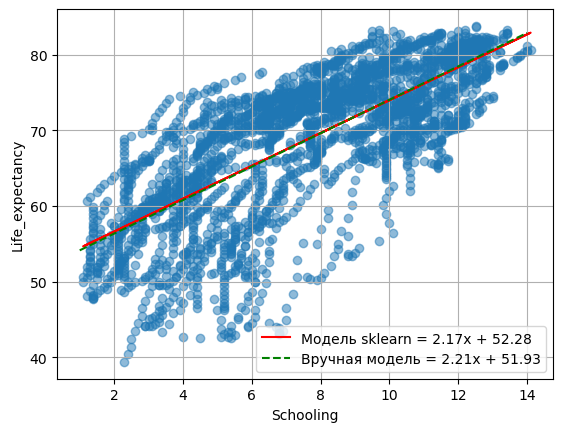

In [15]:
x = np.arange(1, 15)
our_model_y = next_w1 * x + next_w0

plt.plot(X, model_y_sk, color="r", label=f"Модель sklearn = {model_a:.2f}x + {model_b:.2f}")
plt.plot(x, our_model_y, "--g", label=f"Вручная модель = {next_w1:.2f}x + {next_w0:.2f}")
plt.scatter(X, y, alpha=0.5)
plt.xlabel(most_correlated)
plt.ylabel(target)
plt.grid()
plt.legend()
plt.show()

*Визуализированные линии наслаиваются друг на друга. В целом, оба 
похода приводят к хорошим результатам.*

### 3.
Загрузить данные: 'insurance.csv'. Вывести и провести предобработку. 
Вывести список уникальных регионов. 

In [16]:
data = pd.read_csv('insurance.csv')

In [17]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
unique_regions = data['region'].unique()
print(f"Уникальные регионы: {unique_regions}")

Уникальные регионы: ['southwest' 'southeast' 'northwest' 'northeast']


3.1. Выполнить однофакторный ANOVA тест, чтобы проверить влияние 
региона на индекс массы тела (BMI), используя первый способ, 
через библиотеку Scipy. 

In [21]:
regions_groups = [group['bmi'].values for name, group in data.groupby('region')]
f_stat, p_value = stats.f_oneway(*regions_groups)
print(f"ANOVA F-статистика: {f_stat}, p-значение: {p_value}")

ANOVA F-статистика: 39.49505720170283, p-значение: 1.881838913929143e-24


3.2. Выполнить однофакторный ANOVA тест, чтобы проверить влияние 
региона на индекс массы тела (BMI), используя второй способ, с 
помощью функции anova_lm() из библиотеки statsmodels. 

In [22]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('bmi ~ region', data=data).fit()
anova_results = anova_lm(model, typ=2)
anova_results

sum_sq      df          F        PR(>F)
region     4055.880631     3.0  39.495057  1.881839e-24
Residual  45664.319755  1334.0        NaN           NaN

3.3. С помощью t критерия Стьюдента перебрать все пары. Определить 
поправку Бонферрони. Сделать выводы. 

In [23]:
from itertools import combinations

pairs = list(combinations(unique_regions, 2))
bonferroni_correction = len(pairs)

result = []

for pair in pairs:
    group1 = data[data['region'] == pair[0]]['bmi']
    group2 = data[data['region'] == pair[1]]['bmi']
    
    t_stat, p_val = stats.ttest_ind(group1, group2)
    p_adjusted = p_val * bonferroni_correction
    hypothesis = "принимается" if p_adjusted > 0.05 else "отклоняется"
    
    result.append([pair, t_stat, "{:.20f}".format(p_val), "{:.20f}".format(p_adjusted), hypothesis])

results = pd.DataFrame(result, columns=['Сравнение', 't-статистика', 'p-значение', 'скорректированное p-значение', 'гипотеза'])
results

Сравнение  t-статистика              p-значение  \
0  (southwest, southeast)     -5.908374  0.00000000543740096397   
1  (southwest, northwest)      3.284417  0.00107695849630769507   
2  (southwest, northeast)      3.116900  0.00190861616715730723   
3  (southeast, northwest)      9.256490  0.00000000000000000026   
4  (southeast, northeast)      8.790906  0.00000000000000001186   
5  (northwest, northeast)      0.060308  0.95192917082186401245   

  скорректированное p-значение     гипотеза  
0       0.00000003262440578381  отклоняется  
1       0.00646175097784617083  отклоняется  
2       0.01145169700294384335  отклоняется  
3       0.00000000000000000159  отклоняется  
4       0.00000000000000007116  отклоняется  
5       5.71157502493118407472  принимается

3.4. Выполнить пост-хок тесты Тьюки и построить график. 

In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(endog=data['bmi'], groups=data['region'], alpha=0.05)
tukey_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

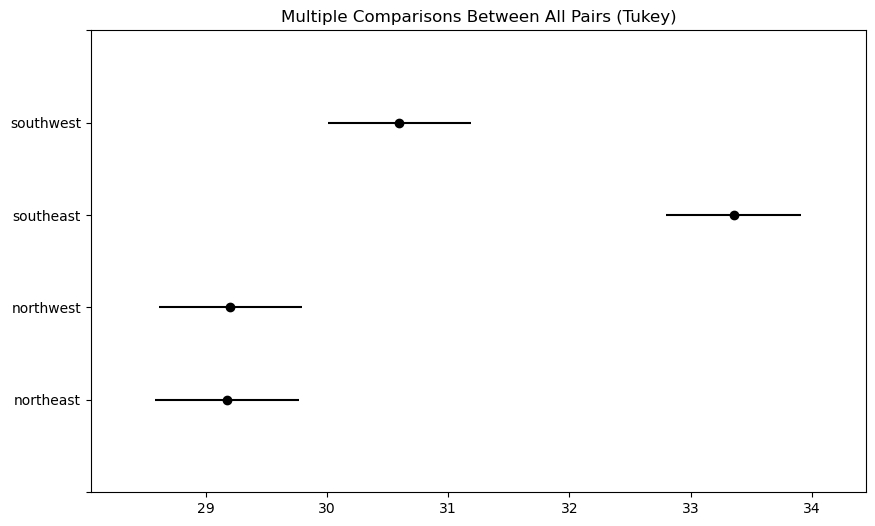

In [25]:
tukey_results.plot_simultaneous()
plt.show()

3.5. Выполнить двухфакторный ANOVA тест, чтобы проверить влияние 
региона и пола на индекс массы тела (BMI), используя функцию 
anova_lm() из библиотеки statsmodels. 


In [26]:
model = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=data).fit()
two_way_results = anova_lm(model, typ=2)

effect = two_way_results['PR(>F)'].apply(lambda x: "" if pd.isna(x) else "true" if x < 0.05 else "false")
two_way_results['PR(>F)'] = two_way_results['PR(>F)'].apply(lambda x: "{:.25f}".format(x) if pd.notna(x) else x)
two_way_results = two_way_results.assign(effect=effect)

two_way_results

sum_sq      df          F  \
C(region)          4034.975135     3.0  39.398134   
C(sex)               86.007035     1.0   2.519359   
C(region):C(sex)    174.157808     3.0   1.700504   
Residual          45404.154911  1330.0        NaN   

                                       PR(>F) effect  
C(region)         0.0000000000000000000000022   true  
C(sex)            0.1126939977307559043184781  false  
C(region):C(sex)  0.1650654849394681267238383  false  
Residual                                  NaN

3.6. Выполнить пост-хок тесты Тьюки и построить график.

In [27]:
data['combination'] = data.region + " / " + data.sex
two_way_tukey_results = pairwise_tukeyhsd(endog=data['bmi'], groups=data['combination'], alpha=0.05)
two_way_tukey_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

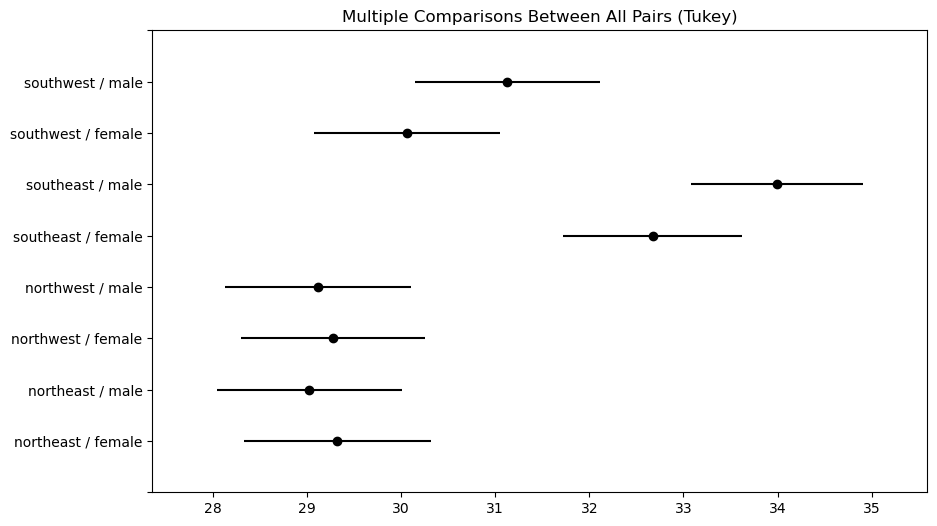

In [28]:
two_way_tukey_results.plot_simultaneous()
plt.show()

### 4. Выводы

1. Векторная зависимость между количеством автомобилей на улице и в гараже была найдена, с сильной отрицательной корреляцией
2. Линейная регрессия составленная вручную представленная прямая образом прошла вдоль точек из обучающей выборки. А также они накладываются друг на друга с учетом небольшой погрешности.
3. Значимые различия в среднем BMI присутствуют для комбинаций региона и пола. Большинство пар с незначительными различиями включают одинаковые полы или регионы, что соответсвует ожиданию.